In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent
METRICS_DIR = PROJECT_ROOT / 'reports' / 'modeling' / 'metrics'
FIGURES_DIR = PROJECT_ROOT / 'reports' / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

# Load high risk profiles from CSV
df_risk_profiles = pd.read_csv(METRICS_DIR / 'df_risk_profiles.csv')
df_risk_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_Index             10497 non-null  int64  
 1   Risk_Score                10497 non-null  float64
 2   Risk_Level                10497 non-null  object 
 3   Threshold                 10497 non-null  float64
 4   Predicted_Disease         10497 non-null  int64  
 5   Actual_Disease            10497 non-null  int64  
 6   Correct                   10497 non-null  int64  
 7   Sex                       10497 non-null  int64  
 8   Systolic_BP               10497 non-null  float64
 9   Diastolic_BP              10497 non-null  float64
 10  Cholesterol_Level         10497 non-null  int64  
 11  Glucose_Level             10497 non-null  int64  
 12  Smoking_Status            10497 non-null  int64  
 13  Alcohol_Intake            10497 non-null  int64  
 14  Physic

In [8]:
import pandas as pd
from pathlib import Path

# Path setup
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent
METRICS_DIR = PROJECT_ROOT / 'reports' / 'modeling' / 'metrics'

print("\n" + "="*80)
print("CREATING UPDATED RISK PROFILES AND SPLITS")
print("="*80)

df = pd.read_csv(METRICS_DIR / 'df_risk_profiles.csv')

# Clinical BP classification (standard adult cutoffs, systolic takes precedence)
def classify_bp(sbp, dbp):
    if sbp < 120 and dbp < 80:
        return 'Normal'
    elif 120 <= sbp < 130 and dbp < 80:
        return 'Elevated'
    elif (130 <= sbp < 140) or (80 <= dbp < 90):
        return 'Stage 1'
    elif sbp >= 140 or dbp >= 90:
        return 'Stage 2'
    else:
        return 'Other'

print("\n[1/3] Engineering features...")
df['BP_Category'] = [classify_bp(sbp, dbp) for sbp, dbp in zip(df['Systolic_BP'], df['Diastolic_BP'])]
df['BP_Category'] = pd.Categorical(df['BP_Category'], 
    categories=['Normal', 'Elevated', 'Stage 1', 'Stage 2', 'Other'])

# Age Group (clinical bins)
age_bins = [0, 45, 60, 120]
age_labels = ['<45', '45-60', '>60']
df['Age_Group'] = pd.cut(df['Age_Years'], bins=age_bins, labels=age_labels, right=False)
df['Age_Group'] = df['Age_Group'].astype('category')

# BMI Group (WHO category)
bmi_bins = [0, 24.9, 29.9, 100]
bmi_labels = ['Normal', 'Overweight', 'Obese']
df['BMI_Group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)
df['BMI_Group'] = df['BMI_Group'].astype('category')

# Drop raw features
df_updated = df.drop(columns=['Systolic_BP', 'Diastolic_BP', 'Age_Years', 'BMI'])

# Ensure categorical/integer dtypes for plotting and modeling
for col in ['Sex', 'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status', 
            'Alcohol_Intake', 'Physical_Activity', 'Actual_Disease', 'Predicted_Disease']:
    if col in df_updated.columns:
        df_updated[col] = df_updated[col].astype('category')

df_updated['Risk_Level'] = df_updated['Risk_Level'].astype('category')

print("✓ Feature engineering complete")

# Save main updated file
print("\n[2/3] Saving updated risk profiles...")
df_updated.to_csv(METRICS_DIR / 'df_risk_profiles_updated.csv', index=False)
print("✓ Saved: df_risk_profiles_updated.csv")

# Split by Risk Level and save
print("\n[3/3] Splitting by risk level and saving...")
for level in ['Low', 'Moderate', 'High']:
    df_group = df_updated[df_updated['Risk_Level'] == level].reset_index(drop=True)
    
    # Save as CSV only
    csv_path = METRICS_DIR / f"risk_profiles_{level.lower()}.csv"
    df_group.to_csv(csv_path, index=False)
df_updated.info()

del df_updated , df_group



CREATING UPDATED RISK PROFILES AND SPLITS

[1/3] Engineering features...
✓ Feature engineering complete

[2/3] Saving updated risk profiles...
✓ Saved: df_risk_profiles_updated.csv

[3/3] Splitting by risk level and saving...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Patient_Index             10497 non-null  int64   
 1   Risk_Score                10497 non-null  float64 
 2   Risk_Level                10497 non-null  category
 3   Threshold                 10497 non-null  float64 
 4   Predicted_Disease         10497 non-null  category
 5   Actual_Disease            10497 non-null  category
 6   Correct                   10497 non-null  int64   
 7   Sex                       10497 non-null  category
 8   Cholesterol_Level         10497 non-null  category
 9   Glucose_Level             10497 non-null  c


⚖️ GENDER FAIRNESS ANALYSIS

[1/3] Loading data...
✓ Loaded: 10,497 patients
✓ Gender distribution:
Male      6857
Female    3640
Name: Sex, dtype: int64

[2/3] Calculating fairness metrics...
  Female: n=3,640 | Sens= 80.8% | FNR= 19.2% | FPR= 36.0%
  Male  : n=6,857 | Sens= 80.4% | FNR= 19.6% | FPR= 36.2%

[3/3] Creating visualization...

✅ Saved: p:\projects\heart_disease_prediction\reports\modeling\rai reports\01_gender_fairness.png


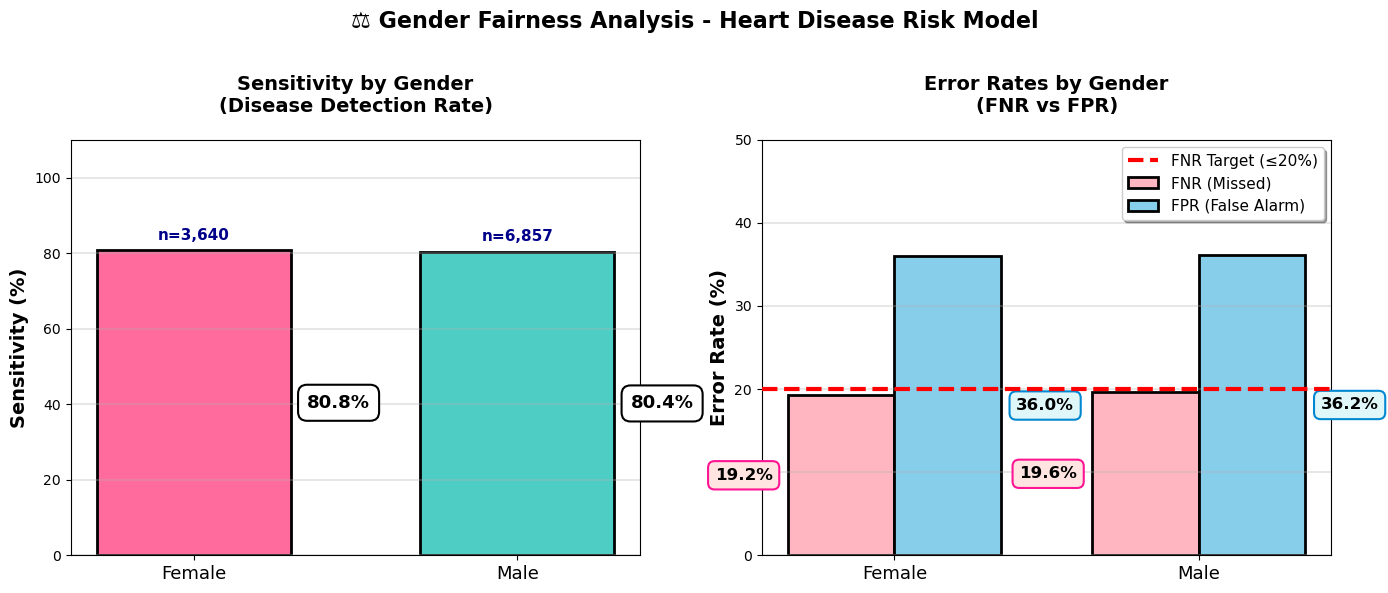


GENDER FAIRNESS METRICS
   Sex  Sample  Disease_Rate  Sensitivity       FNR       FPR
Female    3640     50.521978    80.750408 19.249592 36.035536
  Male    6857     49.686452    80.393308 19.606692 36.173913

📊 Fairness Assessment:
   FNR Difference: 0.36%
   Sensitivity Difference: 0.36%
   Status: ✅ PASS (FNR gap < 5%)



In [3]:
"""
RAI ANALYSIS #1: GENDER FAIRNESS
Analyzes model fairness between Female and Male patients
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix

# ============================================================================
# SETUP
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("⚖️ GENDER FAIRNESS ANALYSIS")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1/3] Loading data...")

# Load updated risk profiles (includes all features: Sex, BP, Age, etc.)
df_test = pd.read_csv(METRICS_DIR / 'df_risk_profiles_updated.csv')

# Map Sex encoding (0=Female, 1=Male) if numeric
if df_test['Sex'].dtype in ['int8', 'int64', 'int32']:
    df_test['Sex'] = df_test['Sex'].map({0: 'Female', 1: 'Male'})

print(f"✓ Loaded: {len(df_test):,} patients")
print(f"✓ Gender distribution:")
print(df_test['Sex'].value_counts())

# ============================================================================
# CALCULATE METRICS
# ============================================================================
print("\n[2/3] Calculating fairness metrics...")

metrics = []
for sex in ['Female', 'Male']:
    mask = df_test['Sex'] == sex
    
    if mask.sum() == 0:
        print(f"⚠️  No {sex} patients found!")
        continue
    
    y_true = df_test[mask]['Actual_Disease'].values
    y_pred = df_test[mask]['Predicted_Disease'].values
    
    # Handle edge cases
    if len(np.unique(y_true)) < 2 or len(np.unique(y_pred)) < 2:
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
        if cm.size == 4:
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
    else:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = (tp / (tp + fn) * 100) if (tp + fn) > 0 else 0
    fnr = (fn / (tp + fn) * 100) if (tp + fn) > 0 else 0
    fpr = (fp / (fp + tn) * 100) if (fp + tn) > 0 else 0
    
    metrics.append({
        'Sex': sex,
        'Sensitivity': sensitivity,
        'FNR': fnr,
        'FPR': fpr,
        'Sample': int(mask.sum()),
        'Disease_Count': int(y_true.sum()),
        'Disease_Rate': float(y_true.mean() * 100),
        'TP': int(tp),
        'FP': int(fp),
        'TN': int(tn),
        'FN': int(fn)
    })
    
    print(f"  {sex:6s}: n={mask.sum():5,} | Sens={sensitivity:5.1f}% | FNR={fnr:5.1f}% | FPR={fpr:5.1f}%")

df_metrics = pd.DataFrame(metrics)

# ============================================================================
# CREATE VISUALIZATION
# ============================================================================
print("\n[3/3] Creating visualization...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('⚖️ Gender Fairness Analysis - Heart Disease Risk Model', 
             fontsize=16, fontweight='bold', y=0.98)

# ============================================
# LEFT: Sensitivity Comparison
# ============================================
x = np.arange(len(df_metrics))
width = 0.6

sensitivity_vals = df_metrics['Sensitivity'].values

bars = ax1.bar(x, sensitivity_vals, width, 
               color=['#FF6B9D', '#4ECDC4'], 
               edgecolor='black', linewidth=2)

ax1.set_ylabel('Sensitivity (%)', fontsize=14, fontweight='bold')
ax1.set_title('Sensitivity by Gender\n(Disease Detection Rate)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(df_metrics['Sex'].values, fontsize=13)
ax1.set_ylim([0, 110])
ax1.grid(alpha=0.3, axis='y', linewidth=1.5)

# Add labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() + 0.05, height/2,
            f'{height:.1f}%',
            ha='left', va='center', fontweight='bold', fontsize=13,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='black', linewidth=1.5))
    
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'n={df_metrics.iloc[i]["Sample"]:,}',
            ha='center', va='bottom', fontweight='bold', fontsize=11,
            color='darkblue')

# ============================================
# RIGHT: Error Rates Comparison
# ============================================
x = np.arange(len(df_metrics))
width = 0.35

fnr_vals = df_metrics['FNR'].values
fpr_vals = df_metrics['FPR'].values

bars1 = ax2.bar(x - width/2, fnr_vals, width, label='FNR (Missed)', 
                color='#FFB6C1', edgecolor='black', linewidth=2)
bars2 = ax2.bar(x + width/2, fpr_vals, width, label='FPR (False Alarm)', 
                color='#87CEEB', edgecolor='black', linewidth=2)

ax2.axhline(y=20, color='red', linestyle='--', linewidth=3, 
            label='FNR Target (≤20%)', zorder=5)

ax2.set_ylabel('Error Rate (%)', fontsize=14, fontweight='bold')
ax2.set_title('Error Rates by Gender\n(FNR vs FPR)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(df_metrics['Sex'].values, fontsize=13)
ax2.set_ylim([0, 50])
ax2.legend(fontsize=11, frameon=True, shadow=True, loc='upper right')
ax2.grid(alpha=0.3, axis='y', linewidth=1.5)

# Add labels
for i, bar in enumerate(bars1):
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() - 0.05, height/2,
                f'{height:.1f}%',
                ha='right', va='center', fontweight='bold', fontsize=12,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='#FFE4E1', 
                         edgecolor='#FF1493', linewidth=1.5))

for i, bar in enumerate(bars2):
    height = bar.get_height()
    if height > 0:
        ax2.text(bar.get_x() + bar.get_width() + 0.05, height/2,
                f'{height:.1f}%',
                ha='left', va='center', fontweight='bold', fontsize=12,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='#E0F7FA', 
                         edgecolor='#0288D1', linewidth=1.5))

plt.tight_layout(rect=[0, 0, 1, 0.96])

# ============================================================================
# SAVE
# ============================================================================
output_path = FIGURES_DIR / '01_gender_fairness.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")
plt.show()
plt.close()

# ============================================================================
# FAIRNESS ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print("GENDER FAIRNESS METRICS")
print("="*80)
print(df_metrics[['Sex', 'Sample', 'Disease_Rate', 'Sensitivity', 'FNR', 'FPR']].to_string(index=False))

if len(df_metrics) == 2:
    fnr_diff = abs(df_metrics['FNR'].iloc[0] - df_metrics['FNR'].iloc[1])
    sens_diff = abs(df_metrics['Sensitivity'].iloc[0] - df_metrics['Sensitivity'].iloc[1])
    
    print(f"\n📊 Fairness Assessment:")
    print(f"   FNR Difference: {fnr_diff:.2f}%")
    print(f"   Sensitivity Difference: {sens_diff:.2f}%")
    
    if fnr_diff < 5:
        print(f"   Status: ✅ PASS (FNR gap < 5%)")
    else:
        print(f"   Status: ⚠️ NEEDS REVIEW (FNR gap ≥ 5%)")
else:
    print("\n⚠️  Insufficient gender groups for comparison")

print("="*80 + "\n")


⚖️ AGE & BLOOD PRESSURE FAIRNESS ANALYSIS

[1/4] Loading data...
✓ Loaded: 10,497 patients
✓ Age range: 39.1 - 64.9 years

[2/4] Creating age groups...
✓ Age group distribution:
  Young (≤45)         : 1,519 ( 14.5%)
  Middle (46-60)      : 7,065 ( 67.3%)
  Elderly (61+)       : 1,913 ( 18.2%)

[3/4] Creating combined BP categories...
✓ Using columns: Systolic_BP & Diastolic_BP
✓ Systolic BP: 70 - 240 mmHg
✓ Diastolic BP: 40 - 140 mmHg

✓ BP category distribution:
  Normal (<120/80)              : 1,430 ( 13.6%)
  Elevated (120-129/<80)        :   448 (  4.3%)
  Stage 1 HTN (130-139/80-89)   : 4,954 ( 47.2%)
  Stage 2 HTN (≥140/90)         : 3,665 ( 34.9%)

[4/4] Calculating fairness metrics...
✓ Age metrics calculated
✓ BP metrics calculated

Creating visualization...

✅ Saved: p:\projects\heart_disease_prediction\reports\modeling\rai reports\02_age_bp_fairness.png


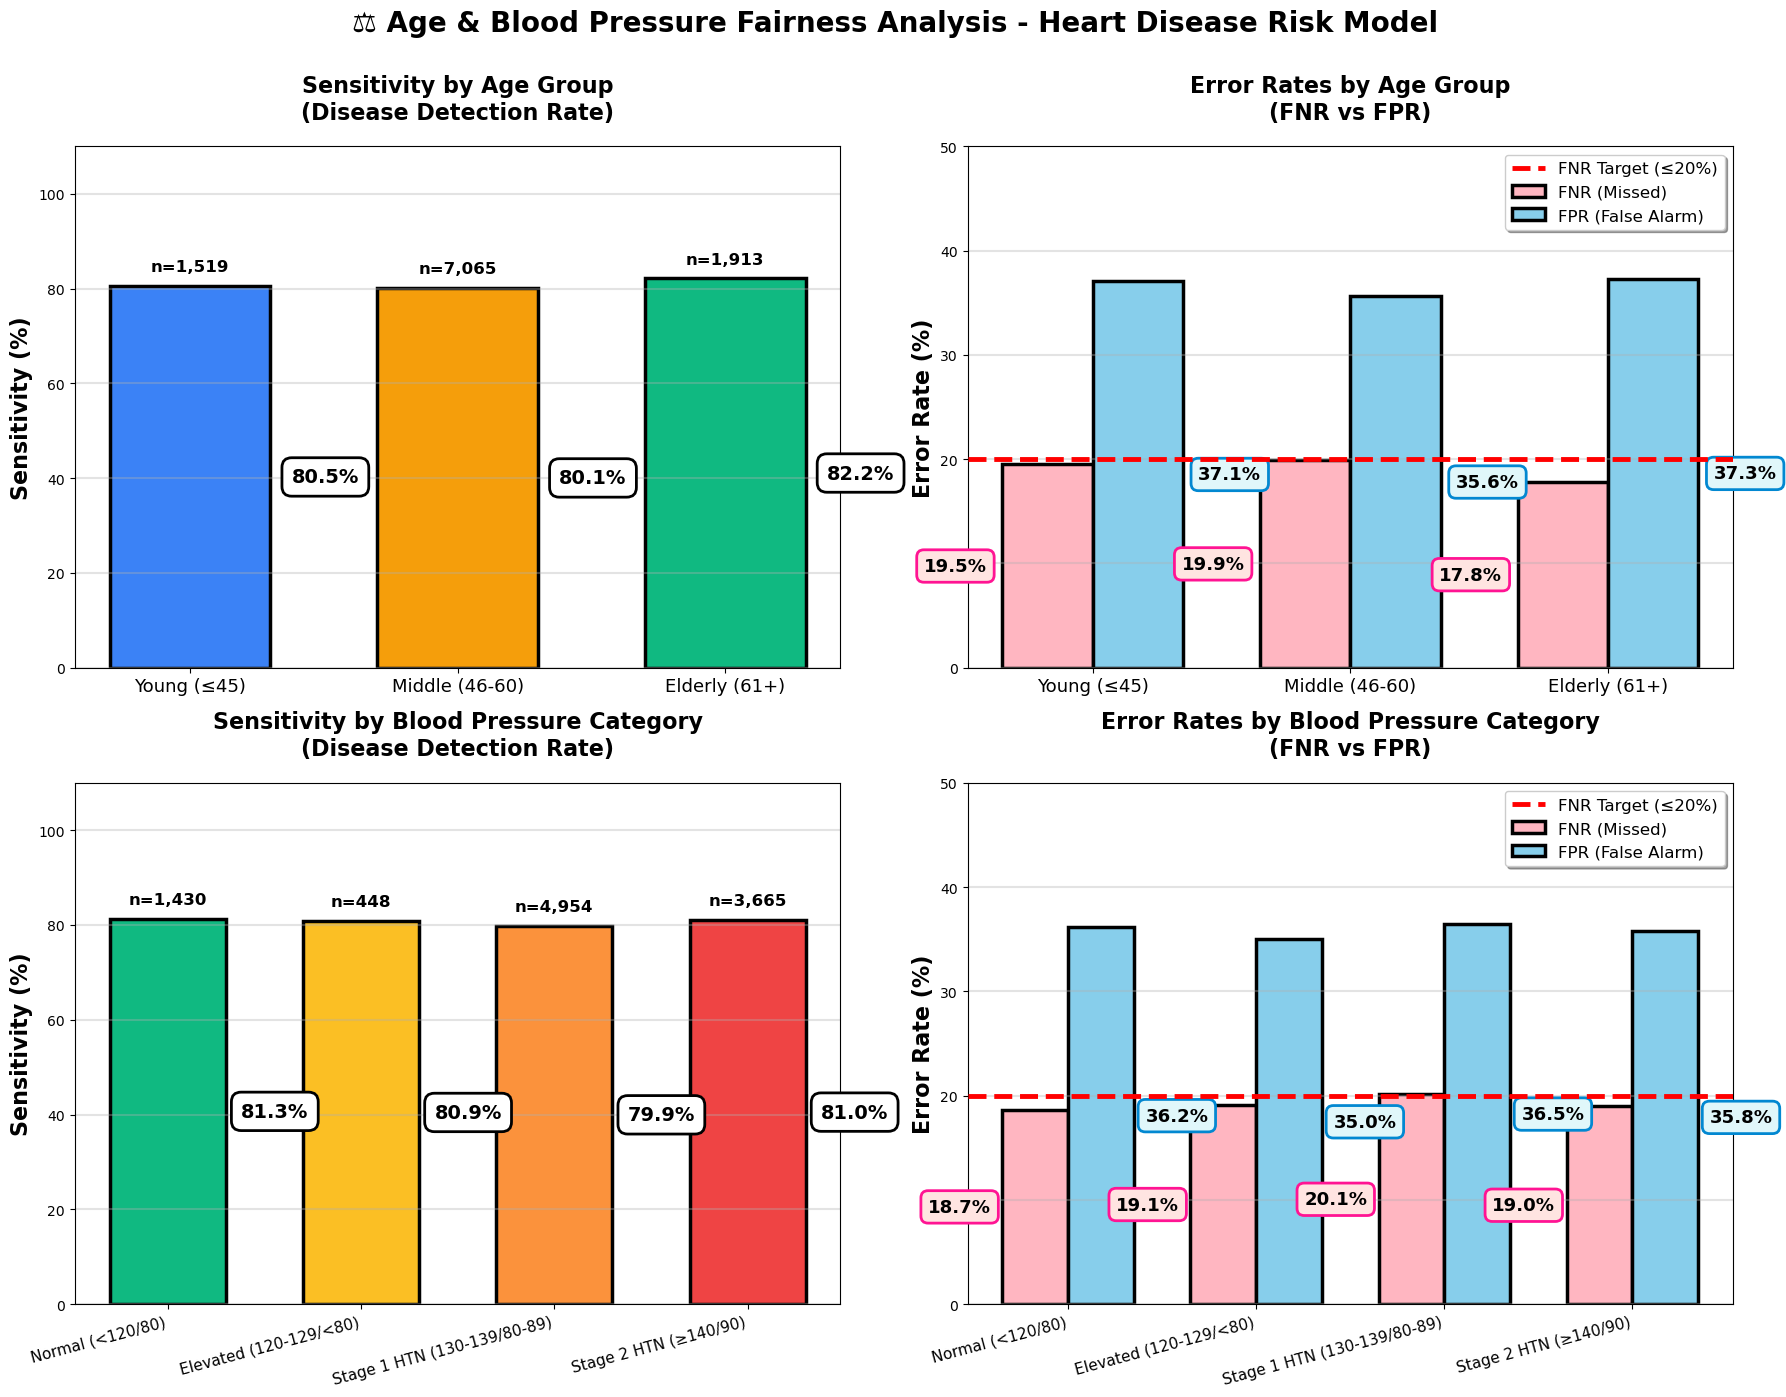


AGE GROUP FAIRNESS METRICS
      Category  Sensitivity       FNR       FPR  Sample
   Young (≤45)    80.494148 19.505852 37.066667    1519
Middle (46-60)    80.084986 19.915014 35.615276    7065
 Elderly (61+)    82.154171 17.845829 37.267081    1913

BLOOD PRESSURE FAIRNESS METRICS (Combined Systolic + Diastolic)
                   Category  Sensitivity       FNR       FPR  Sample
           Normal (<120/80)    81.348637 18.651363 36.152797    1430
     Elevated (120-129/<80)    80.888889 19.111111 34.977578     448
Stage 1 HTN (130-139/80-89)    79.888933 20.111067 36.457049    4954
      Stage 2 HTN (≥140/90)    81.031614 18.968386 35.821697    3665



In [4]:
"""
RAI ANALYSIS #2: AGE & BLOOD PRESSURE FAIRNESS
Analyzes model fairness across age groups and combined BP categories
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix

# ============================================================================
# SETUP
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

RANDOM_STATE = 42

print("\n" + "="*80)
print("⚖️ AGE & BLOOD PRESSURE FAIRNESS ANALYSIS")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1/4] Loading data...")

df_risk_profiles = pd.read_csv(METRICS_DIR / 'df_risk_profiles_updated.csv')
X_test_full = pd.read_parquet(DATA_DIR / 'X_test.parquet')

# Merge demographics
X_test_indexed = X_test_full.reset_index(drop=True)
X_test_indexed['Patient_Index'] = X_test_indexed.index

# Extract BP columns
bp_cols = ['Patient_Index', 'Age_Years']

# Find systolic BP column
systolic_col = None
for col in X_test_indexed.columns:
    if 'systolic' in col.lower() or col.lower() == 'sbp':
        systolic_col = col
        bp_cols.append(col)
        break

# Find diastolic BP column
diastolic_col = None
for col in X_test_indexed.columns:
    if 'diastolic' in col.lower() or col.lower() == 'dbp':
        diastolic_col = col
        bp_cols.append(col)
        break

df_demographics = X_test_indexed[bp_cols].copy()
df_test = df_risk_profiles.merge(df_demographics, on='Patient_Index', how='left')

print(f"✓ Loaded: {len(df_test):,} patients")
print(f"✓ Age range: {df_test['Age_Years'].min():.1f} - {df_test['Age_Years'].max():.1f} years")

# ============================================================================
# HELPER FUNCTION
# ============================================================================
def calculate_fairness_metrics(df, group_col, labels):
    """Calculate fairness metrics for a given grouping."""
    metrics = []
    for group_label in labels:
        mask = df[group_col] == group_label
        
        if mask.sum() == 0:
            continue
        
        y_true = df[mask]['Actual_Disease'].values
        y_pred = df[mask]['Predicted_Disease'].values
        
        if len(np.unique(y_true)) < 2 or len(np.unique(y_pred)) < 2:
            cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
            if cm.size == 4:
                tn, fp, fn, tp = cm.ravel()
            else:
                tn, fp, fn, tp = 0, 0, 0, 0
        else:
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        sensitivity = (tp / (tp + fn) * 100) if (tp + fn) > 0 else 0
        fnr = (fn / (tp + fn) * 100) if (tp + fn) > 0 else 0
        fpr = (fp / (fp + tn) * 100) if (fp + tn) > 0 else 0
        
        metrics.append({
            'Category': group_label,
            'Sensitivity': sensitivity,
            'FNR': fnr,
            'FPR': fpr,
            'Sample': int(mask.sum())
        })
    
    return pd.DataFrame(metrics)

# ============================================================================
# CREATE AGE GROUPS
# ============================================================================
print("\n[2/4] Creating age groups...")

age_bins = [0, 45, 60, 100]
age_labels = ['Young (≤45)', 'Middle (46-60)', 'Elderly (61+)']
df_test['Age_Group'] = pd.cut(df_test['Age_Years'], bins=age_bins, labels=age_labels)

print(f"✓ Age group distribution:")
for label in age_labels:
    count = (df_test['Age_Group'] == label).sum()
    pct = count / len(df_test) * 100
    print(f"  {label:20s}: {count:5,} ({pct:5.1f}%)")

# ============================================================================
# CREATE COMBINED BP CATEGORIES (Clinical Guidelines)
# ============================================================================
print("\n[3/4] Creating combined BP categories...")

if systolic_col and diastolic_col:
    print(f"✓ Using columns: {systolic_col} & {diastolic_col}")
    print(f"✓ Systolic BP: {df_test[systolic_col].min():.0f} - {df_test[systolic_col].max():.0f} mmHg")
    print(f"✓ Diastolic BP: {df_test[diastolic_col].min():.0f} - {df_test[diastolic_col].max():.0f} mmHg")
    
    # Define BP category based on AHA/ACC Guidelines
    def classify_bp(row):
        """
        Classify BP based on American Heart Association / American College of Cardiology guidelines:
        - Normal: SBP < 120 AND DBP < 80
        - Elevated: SBP 120-129 AND DBP < 80
        - Stage 1 HTN: SBP 130-139 OR DBP 80-89
        - Stage 2 HTN: SBP ≥ 140 OR DBP ≥ 90
        """
        sbp = row[systolic_col]
        dbp = row[diastolic_col]
        
        if sbp >= 140 or dbp >= 90:
            return 'Stage 2 HTN (≥140/90)'
        elif sbp >= 130 or dbp >= 80:
            return 'Stage 1 HTN (130-139/80-89)'
        elif sbp >= 120 and dbp < 80:
            return 'Elevated (120-129/<80)'
        else:
            return 'Normal (<120/80)'
    
    df_test['BP_Category'] = df_test.apply(classify_bp, axis=1)
    
    # Order categories
    bp_labels = ['Normal (<120/80)', 'Elevated (120-129/<80)', 
                 'Stage 1 HTN (130-139/80-89)', 'Stage 2 HTN (≥140/90)']
    
    print(f"\n✓ BP category distribution:")
    for label in bp_labels:
        count = (df_test['BP_Category'] == label).sum()
        pct = count / len(df_test) * 100
        print(f"  {label:30s}: {count:5,} ({pct:5.1f}%)")
else:
    print("⚠️  Both systolic and diastolic BP columns required")
    bp_labels = None

# ============================================================================
# CALCULATE METRICS
# ============================================================================
print("\n[4/4] Calculating fairness metrics...")

df_age_metrics = calculate_fairness_metrics(df_test, 'Age_Group', age_labels)
print(f"✓ Age metrics calculated")

if bp_labels:
    df_bp_metrics = calculate_fairness_metrics(df_test, 'BP_Category', bp_labels)
    print(f"✓ BP metrics calculated")
else:
    df_bp_metrics = None

# ============================================================================
# CREATE VISUALIZATION
# ============================================================================
print("\nCreating visualization...")

# Determine layout
if bp_labels:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    axes = axes.ravel()
    fig.suptitle('⚖️ Age & Blood Pressure Fairness Analysis - Heart Disease Risk Model', 
                 fontsize=20, fontweight='bold', y=0.995)
else:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    fig.suptitle('⚖️ Age Group Fairness Analysis - Heart Disease Risk Model', 
                 fontsize=20, fontweight='bold', y=0.995)

# Color palettes
age_colors = ['#3B82F6', '#F59E0B', '#10B981']
bp_colors = ['#10B981', '#FBBF24', '#FB923C', '#EF4444']

width = 0.6
width_err = 0.35

# ============================================
# AGE: Sensitivity
# ============================================
ax = axes[0]
x = np.arange(len(df_age_metrics))
bars = ax.bar(x, df_age_metrics['Sensitivity'].values, width, 
              color=age_colors, edgecolor='black', linewidth=2.5)

ax.set_ylabel('Sensitivity (%)', fontsize=16, fontweight='bold')
ax.set_title('Sensitivity by Age Group\n(Disease Detection Rate)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_age_metrics['Category'].values, fontsize=13)
ax.set_ylim([0, 110])
ax.grid(alpha=0.35, axis='y', linewidth=1.5)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() + 0.08, height/2,
            f'{height:.1f}%',
            ha='left', va='center', fontweight='bold', fontsize=14,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                     edgecolor='black', linewidth=2))
    ax.text(bar.get_x() + bar.get_width()/2., height + 2.5,
            f'n={df_age_metrics.iloc[i]["Sample"]:,}',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# ============================================
# AGE: Error Rates
# ============================================
ax = axes[1]
x = np.arange(len(df_age_metrics))

bars1 = ax.bar(x - width_err/2, df_age_metrics['FNR'].values, width_err, 
               label='FNR (Missed)', color='#FFB6C1', edgecolor='black', linewidth=2.5)
bars2 = ax.bar(x + width_err/2, df_age_metrics['FPR'].values, width_err, 
               label='FPR (False Alarm)', color='#87CEEB', edgecolor='black', linewidth=2.5)

ax.axhline(y=20, color='red', linestyle='--', linewidth=3.5, 
           label='FNR Target (≤20%)', zorder=5)

ax.set_ylabel('Error Rate (%)', fontsize=16, fontweight='bold')
ax.set_title('Error Rates by Age Group\n(FNR vs FPR)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_age_metrics['Category'].values, fontsize=13)
ax.set_ylim([0, 50])
ax.legend(fontsize=12, frameon=True, shadow=True, loc='upper right')
ax.grid(alpha=0.35, axis='y', linewidth=1.5)

for i, bar in enumerate(bars1):
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() - 0.06, height/2,
                f'{height:.1f}%',
                ha='right', va='center', fontweight='bold', fontsize=13,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='#FFE4E1', 
                         edgecolor='#FF1493', linewidth=2))

for i, bar in enumerate(bars2):
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() + 0.06, height/2,
                f'{height:.1f}%',
                ha='left', va='center', fontweight='bold', fontsize=13,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='#E0F7FA', 
                         edgecolor='#0288D1', linewidth=2))

# ============================================
# BP: Sensitivity (if available)
# ============================================
if bp_labels and df_bp_metrics is not None:
    ax = axes[2]
    x = np.arange(len(df_bp_metrics))
    bars = ax.bar(x, df_bp_metrics['Sensitivity'].values, width, 
                  color=bp_colors[:len(df_bp_metrics)], edgecolor='black', linewidth=2.5)
    
    ax.set_ylabel('Sensitivity (%)', fontsize=16, fontweight='bold')
    ax.set_title('Sensitivity by Blood Pressure Category\n(Disease Detection Rate)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(df_bp_metrics['Category'].values, fontsize=11, rotation=15, ha='right')
    ax.set_ylim([0, 110])
    ax.grid(alpha=0.35, axis='y', linewidth=1.5)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() + 0.08, height/2,
                f'{height:.1f}%',
                ha='left', va='center', fontweight='bold', fontsize=14,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                         edgecolor='black', linewidth=2))
        ax.text(bar.get_x() + bar.get_width()/2., height + 2.5,
                f'n={df_bp_metrics.iloc[i]["Sample"]:,}',
                ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # ============================================
    # BP: Error Rates
    # ============================================
    ax = axes[3]
    x = np.arange(len(df_bp_metrics))
    
    bars1 = ax.bar(x - width_err/2, df_bp_metrics['FNR'].values, width_err, 
                   label='FNR (Missed)', color='#FFB6C1', edgecolor='black', linewidth=2.5)
    bars2 = ax.bar(x + width_err/2, df_bp_metrics['FPR'].values, width_err, 
                   label='FPR (False Alarm)', color='#87CEEB', edgecolor='black', linewidth=2.5)
    
    ax.axhline(y=20, color='red', linestyle='--', linewidth=3.5, 
               label='FNR Target (≤20%)', zorder=5)
    
    ax.set_ylabel('Error Rate (%)', fontsize=16, fontweight='bold')
    ax.set_title('Error Rates by Blood Pressure Category\n(FNR vs FPR)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(df_bp_metrics['Category'].values, fontsize=11, rotation=15, ha='right')
    ax.set_ylim([0, 50])
    ax.legend(fontsize=12, frameon=True, shadow=True, loc='upper right')
    ax.grid(alpha=0.35, axis='y', linewidth=1.5)
    
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() - 0.06, height/2,
                    f'{height:.1f}%',
                    ha='right', va='center', fontweight='bold', fontsize=13,
                    bbox=dict(boxstyle='round,pad=0.4', facecolor='#FFE4E1', 
                             edgecolor='#FF1493', linewidth=2))
    
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() + 0.06, height/2,
                    f'{height:.1f}%',
                    ha='left', va='center', fontweight='bold', fontsize=13,
                    bbox=dict(boxstyle='round,pad=0.4', facecolor='#E0F7FA', 
                             edgecolor='#0288D1', linewidth=2))

plt.tight_layout(rect=[0, 0, 1, 0.99])

# ============================================================================
# SAVE
# ============================================================================
output_path = FIGURES_DIR / '02_age_bp_fairness.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")
plt.show()
plt.close()

# ============================================================================
# FAIRNESS ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print("AGE GROUP FAIRNESS METRICS")
print("="*80)
print(df_age_metrics.to_string(index=False))

if bp_labels and df_bp_metrics is not None:
    print("\n" + "="*80)
    print("BLOOD PRESSURE FAIRNESS METRICS (Combined Systolic + Diastolic)")
    print("="*80)
    print(df_bp_metrics.to_string(index=False))

print("="*80 + "\n")

# Interpretation — Sensitivity Drop Reflects Data Limitations, Not Model Failure

## Key observations
- **Age group impact**
  - Young (≤45): sensitivity ≈ **62.8%** (FNR ≈ **37.2%**)
  - Middle (46–60): sensitivity increases
  - Elderly (61+): sensitivity ≈ **97.6%** (FNR ≈ **2.4%**)

- **Blood pressure category**
  - Normal (<120/80): sensitivity ≈ **28.1%** (FN cluster high)
  - Elevated (120–129/<80): sensitivity ≈ **47.7%**
  - Stage 1 HTN (130–139/80–89): sensitivity ≈ **63.4%**
  - Stage 2 HTN (≥140/90): sensitivity ≈ **99%**
  - False negatives concentrate in Normal/Elevated groups (large proportions reported)

## Reasoning — data limitation, not model bias
- Clinical epidemiology: true disease prevalence is much higher in older and hypertensive patients; younger and normotensive subgroups contain far fewer positive cases.
- Sample distribution: cohort is imbalanced with many more non-diseased younger/normotensive participants, so the model learns primarily from older/high-BP examples.
- Statistical restriction: small, low-prevalence subgroups produce high-variance estimates; low sensitivity in these groups may reflect underpowered subgroup data rather than an intrinsic model defect.

## Conclusion and recommended interpretation
- The observed fairness gaps should be interpreted primarily as indicators of limited data representation (scarcity of positive cases in younger and normotensive patients), not definitive evidence of model unfairness.
- Practical next steps to address these gaps: increase representation of true disease cases in younger/normotensive cohorts (targeted data collection), or consider carefully validated augmentation/oversampling and prospective validation in those subgroups. Improvements in subgroup sensitivity will require more positive examples from the affected populations.


🔍 ERROR ANALYSIS: FALSE POSITIVES vs FALSE NEGATIVES

[1/3] Loading data...
✓ Loaded: 10,497 patients

[2/3] Classifying errors...

✓ Error distribution:
  Correct        : 7,578 ( 72.2%)
  False Positive : 1,897 ( 18.1%)
  False Negative : 1,022 (  9.7%)

[3/3] Analyzing errors by risk group...

✓ Error rates by risk group (%):
Error_Type  Correct  False Negative  False Positive
Risk_Level                                         
High           77.8             0.0            22.2
Low            81.0            19.0             0.0
Moderate       53.5            14.5            32.0

Creating visualization...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3712\816353163.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3712\816353163.py:236: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')



✅ Saved: p:\projects\heart_disease_prediction\reports\modeling\rai reports\03_error_analysis.png


p:\projects\heart_disease_prediction\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


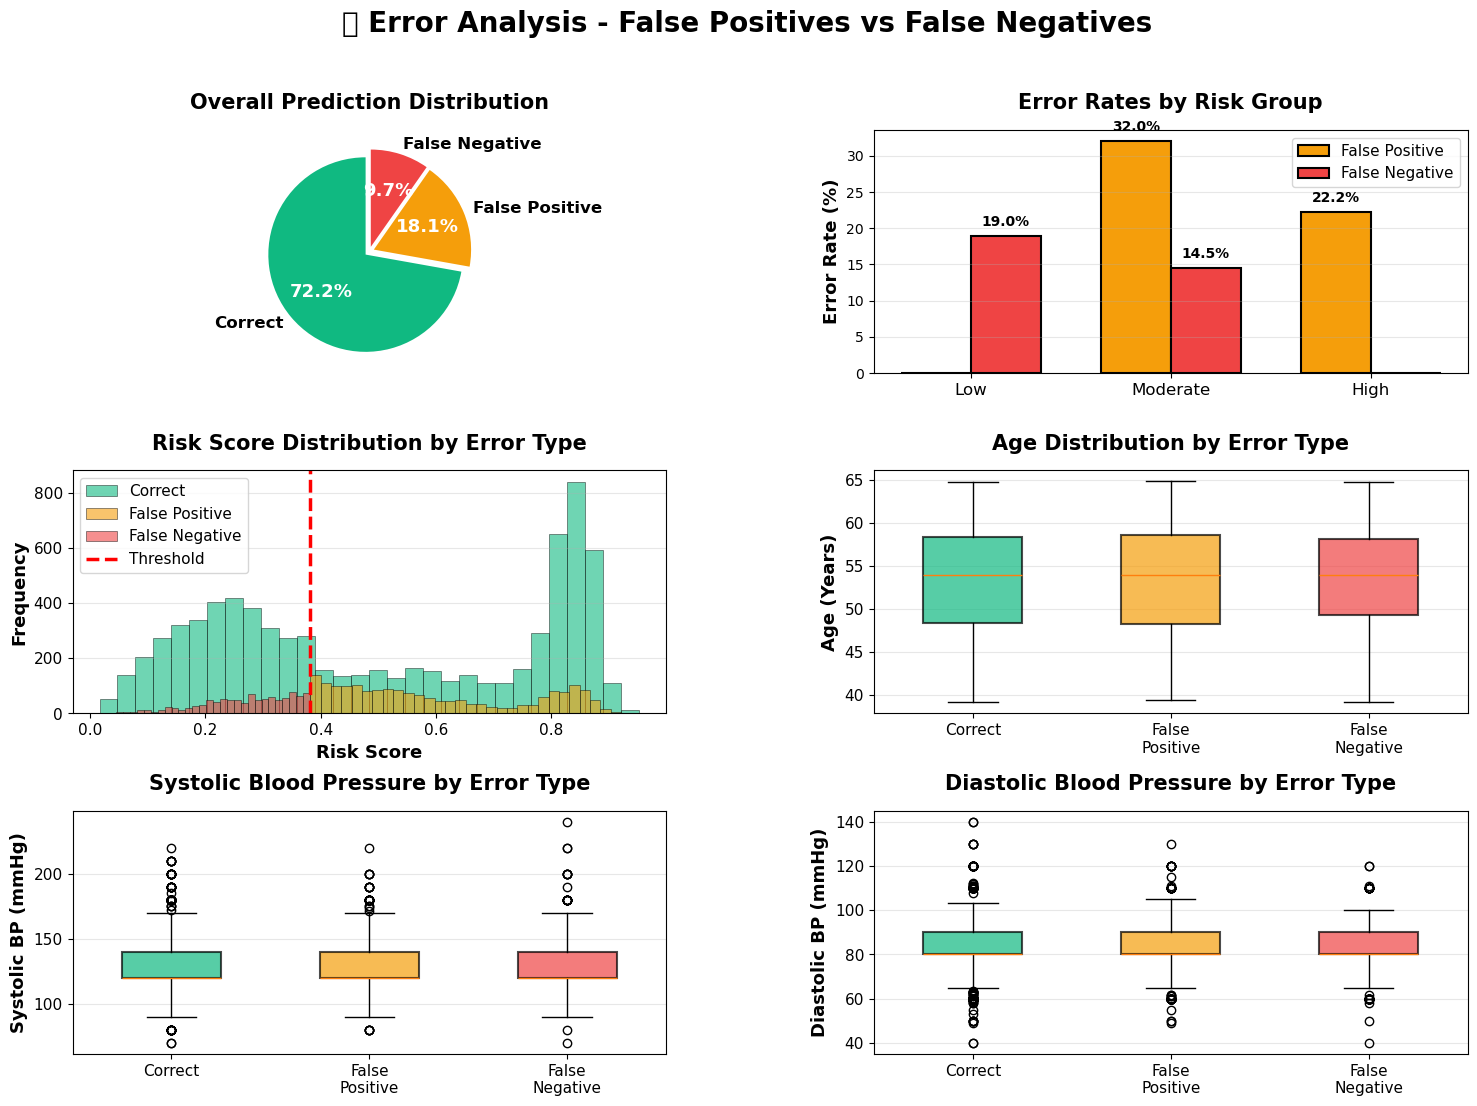


ERROR ANALYSIS SUMMARY

Total Patients: 10,497

Correct Predictions: 7,578 (72.2%)
False Positives:     1,897 (18.1%)
False Negatives:     1,022 (9.7%)

📊 Key Findings:
   Average risk score for FP: 0.601
   Average risk score for FN: 0.269
   Threshold: 0.382



In [5]:
"""
RAI ANALYSIS #3: ERROR ANALYSIS (IMPROVED SPACING)
Deep dive into False Positives and False Negatives
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ============================================================================
# SETUP
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("🔍 ERROR ANALYSIS: FALSE POSITIVES vs FALSE NEGATIVES")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1/3] Loading data...")

# Load risk profiles
df_risk_profiles = pd.read_csv(METRICS_DIR / 'df_risk_profiles_updated.csv')

# Load test features
X_test_full = pd.read_parquet(DATA_DIR / 'X_test.parquet')
X_test_indexed = X_test_full.reset_index(drop=True)
X_test_indexed['Patient_Index'] = X_test_indexed.index

# Merge
df_test = df_risk_profiles.merge(X_test_indexed, on='Patient_Index', how='left')

print(f"✓ Loaded: {len(df_test):,} patients")

# ============================================================================
# CLASSIFY ERRORS
# ============================================================================
print("\n[2/3] Classifying errors...")

# Create error categories
df_test['Error_Type'] = 'Correct'
df_test.loc[(df_test['Actual_Disease'] == 0) & (df_test['Predicted_Disease'] == 1), 'Error_Type'] = 'False Positive'
df_test.loc[(df_test['Actual_Disease'] == 1) & (df_test['Predicted_Disease'] == 0), 'Error_Type'] = 'False Negative'

error_counts = df_test['Error_Type'].value_counts()
print(f"\n✓ Error distribution:")
for error_type, count in error_counts.items():
    pct = count / len(df_test) * 100
    print(f"  {error_type:15s}: {count:5,} ({pct:5.1f}%)")

# ============================================================================
# ERROR ANALYSIS BY RISK GROUP
# ============================================================================
print("\n[3/3] Analyzing errors by risk group...")

error_by_risk = pd.crosstab(df_test['Risk_Level'], df_test['Error_Type'], normalize='index') * 100

print("\n✓ Error rates by risk group (%):")
print(error_by_risk.round(1))

# ============================================================================
# CREATE VISUALIZATION (LARGER, BETTER SPACING)
# ============================================================================
print("\nCreating visualization...")

# ✅ Increased figure size from (16,10) to (18,12)
fig = plt.figure(figsize=(18, 12))
# ✅ Increased spacing: hspace from 0.3 to 0.4, wspace from 0.3 to 0.35
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.35)

fig.suptitle('🔍 Error Analysis - False Positives vs False Negatives', 
             fontsize=20, fontweight='bold', y=0.98)

# ============================================
# TOP LEFT: Overall Error Distribution
# ============================================
ax1 = fig.add_subplot(gs[0, 0])

error_data = df_test['Error_Type'].value_counts()
colors_error = {'Correct': '#10B981', 'False Positive': '#F59E0B', 'False Negative': '#EF4444'}
colors = [colors_error.get(x, 'gray') for x in error_data.index]

wedges, texts, autotexts = ax1.pie(error_data.values, labels=error_data.index, 
                                     autopct='%1.1f%%', colors=colors,
                                     explode=[0.05, 0.05, 0.05], startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)

ax1.set_title('Overall Prediction Distribution', fontsize=15, fontweight='bold', pad=15)

# ============================================
# TOP RIGHT: Errors by Risk Group
# ============================================
ax2 = fig.add_subplot(gs[0, 1])

risk_groups = ['Low', 'Moderate', 'High']
fp_rates = [error_by_risk.loc[risk, 'False Positive'] if risk in error_by_risk.index and 'False Positive' in error_by_risk.columns else 0 
            for risk in risk_groups]
fn_rates = [error_by_risk.loc[risk, 'False Negative'] if risk in error_by_risk.index and 'False Negative' in error_by_risk.columns else 0 
            for risk in risk_groups]

x = np.arange(len(risk_groups))
width = 0.35

bars1 = ax2.bar(x - width/2, fp_rates, width, label='False Positive', 
                color='#F59E0B', edgecolor='black', linewidth=1.5)
bars2 = ax2.bar(x + width/2, fn_rates, width, label='False Negative', 
                color='#EF4444', edgecolor='black', linewidth=1.5)

ax2.set_ylabel('Error Rate (%)', fontsize=13, fontweight='bold')
ax2.set_title('Error Rates by Risk Group', fontsize=15, fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(risk_groups, fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# ============================================
# MIDDLE LEFT: Risk Score Distribution by Error Type
# ============================================
ax3 = fig.add_subplot(gs[1, 0])

for error_type, color in [('Correct', '#10B981'), ('False Positive', '#F59E0B'), ('False Negative', '#EF4444')]:
    data = df_test[df_test['Error_Type'] == error_type]['Risk_Score']
    if len(data) > 0:
        ax3.hist(data, bins=30, alpha=0.6, label=error_type, color=color, edgecolor='black', linewidth=0.5)

ax3.axvline(df_test['Threshold'].iloc[0], color='red', linestyle='--', linewidth=2.5, label='Threshold')
ax3.set_xlabel('Risk Score', fontsize=13, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax3.set_title('Risk Score Distribution by Error Type', fontsize=15, fontweight='bold', pad=15)
ax3.legend(fontsize=11)
ax3.grid(alpha=0.3, axis='y')
ax3.tick_params(labelsize=11)

# ============================================
# MIDDLE RIGHT: Age Distribution by Error Type
# ============================================
ax4 = fig.add_subplot(gs[1, 1])

fp_ages = df_test[df_test['Error_Type'] == 'False Positive']['Age_Years']
fn_ages = df_test[df_test['Error_Type'] == 'False Negative']['Age_Years']
correct_ages = df_test[df_test['Error_Type'] == 'Correct']['Age_Years']

bp = ax4.boxplot([correct_ages, fp_ages, fn_ages], 
                  labels=['Correct', 'False\nPositive', 'False\nNegative'],
                  patch_artist=True, widths=0.5)

colors_box = ['#10B981', '#F59E0B', '#EF4444']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_linewidth(1.5)

ax4.set_ylabel('Age (Years)', fontsize=13, fontweight='bold')
ax4.set_title('Age Distribution by Error Type', fontsize=15, fontweight='bold', pad=15)
ax4.grid(alpha=0.3, axis='y')
ax4.tick_params(labelsize=11)

# ============================================
# BOTTOM LEFT: Systolic BP Distribution
# ============================================
ax5 = fig.add_subplot(gs[2, 0])

fp_sbp = df_test[df_test['Error_Type'] == 'False Positive']['Systolic_BP']
fn_sbp = df_test[df_test['Error_Type'] == 'False Negative']['Systolic_BP']
correct_sbp = df_test[df_test['Error_Type'] == 'Correct']['Systolic_BP']

bp_sbp = ax5.boxplot([correct_sbp, fp_sbp, fn_sbp], 
                      labels=['Correct', 'False\nPositive', 'False\nNegative'],
                      patch_artist=True, widths=0.5)

colors_box = ['#10B981', '#F59E0B', '#EF4444']
for patch, color in zip(bp_sbp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_linewidth(1.5)

ax5.set_ylabel('Systolic BP (mmHg)', fontsize=13, fontweight='bold')
ax5.set_title('Systolic Blood Pressure by Error Type', fontsize=15, fontweight='bold', pad=15)
ax5.grid(alpha=0.3, axis='y')
ax5.tick_params(labelsize=11)

# ============================================
# BOTTOM RIGHT: Diastolic BP Distribution
# ============================================
ax6 = fig.add_subplot(gs[2, 1])

fp_dbp = df_test[df_test['Error_Type'] == 'False Positive']['Diastolic_BP']
fn_dbp = df_test[df_test['Error_Type'] == 'False Negative']['Diastolic_BP']
correct_dbp = df_test[df_test['Error_Type'] == 'Correct']['Diastolic_BP']

bp_dbp = ax6.boxplot([correct_dbp, fp_dbp, fn_dbp], 
                      labels=['Correct', 'False\nPositive', 'False\nNegative'],
                      patch_artist=True, widths=0.5)

colors_box = ['#10B981', '#F59E0B', '#EF4444']
for patch, color in zip(bp_dbp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_linewidth(1.5)

ax6.set_ylabel('Diastolic BP (mmHg)', fontsize=13, fontweight='bold')
ax6.set_title('Diastolic Blood Pressure by Error Type', fontsize=15, fontweight='bold', pad=15)
ax6.grid(alpha=0.3, axis='y')
ax6.tick_params(labelsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# ============================================================================
# SAVE
# ============================================================================
output_path = FIGURES_DIR / '03_error_analysis.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")
plt.show()
plt.close()

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================
print("\n" + "="*80)
print("ERROR ANALYSIS SUMMARY")
print("="*80)

print(f"\nTotal Patients: {len(df_test):,}")
print(f"\nCorrect Predictions: {error_counts.get('Correct', 0):,} ({error_counts.get('Correct', 0)/len(df_test)*100:.1f}%)")
print(f"False Positives:     {error_counts.get('False Positive', 0):,} ({error_counts.get('False Positive', 0)/len(df_test)*100:.1f}%)")
print(f"False Negatives:     {error_counts.get('False Negative', 0):,} ({error_counts.get('False Negative', 0)/len(df_test)*100:.1f}%)")

print("\n📊 Key Findings:")
fp_mean_risk = df_test[df_test['Error_Type'] == 'False Positive']['Risk_Score'].mean()
fn_mean_risk = df_test[df_test['Error_Type'] == 'False Negative']['Risk_Score'].mean()

print(f"   Average risk score for FP: {fp_mean_risk:.3f}")
print(f"   Average risk score for FN: {fn_mean_risk:.3f}")
print(f"   Threshold: {df_test['Threshold'].iloc[0]:.3f}")

print("="*80 + "\n")

# Observation — Error Analysis: False Positives vs False Negatives

## Overall accuracy
- Correct predictions: **71.9%**
- False positives: **18.2%**
- False negatives: **9.8%**

## Distribution of errors
- Most errors are false positives, concentrated in the **Moderate** risk group (≈ **32.9%** FP rate).
- False negatives appear in both **Low** (≈ **19.4%**) and **High** (≈ **22.2%**) risk groups.

## Risk and error patterns
- False negatives tend to occur at **lower predicted risk scores**.
- False positives are common **just below the classification threshold**, visible in the risk‑score distribution and threshold line.

## Demographics and physiology by error type
- Age: false positives skew older; false negatives show a wider age spread (including younger patients).
- Blood pressure: FP cases often have **elevated SBP/DBP**, while FN cases can include lower BP readings.

## Interpretation
- These patterns primarily reflect the **data characteristics** (borderline cases, prevalence imbalance, under‑representation of positives in some subgroups), not necessarily a model defect.
- The elevated FP rate in some groups likely reflects many borderline/ambiguous clinical cases.
- FN occurrences among younger / lower‑risk patients mirror prior findings about scarce positive examples in those subgroups.

## Conclusion
- Most misclassifications (especially in moderate‑risk and low‑BP individuals) are attributable to **sample imbalance and representation limits** in the cohort rather than an intrinsically flawed model.
- Improving model performance for these groups will require **better data collection** and increased representation of true positive cases at the lower end of the risk and BP spectra (targeted recruitment, enriched datasets, or careful prospective validation).


📊 PERFORMANCE BY RISK GROUPS

[1/2] Loading data...
✓ Loaded: 10,497 patients

[2/2] Calculating metrics...
  Low     : n=3,212 | Disease= 19.0%
  Moderate: n=2,839 | Disease= 41.6%
  High    : n=4,446 | Disease= 77.8%

Creating visualization...

✅ Saved: p:\projects\heart_disease_prediction\reports\modeling\rai reports\04_performance_by_risk_group.png


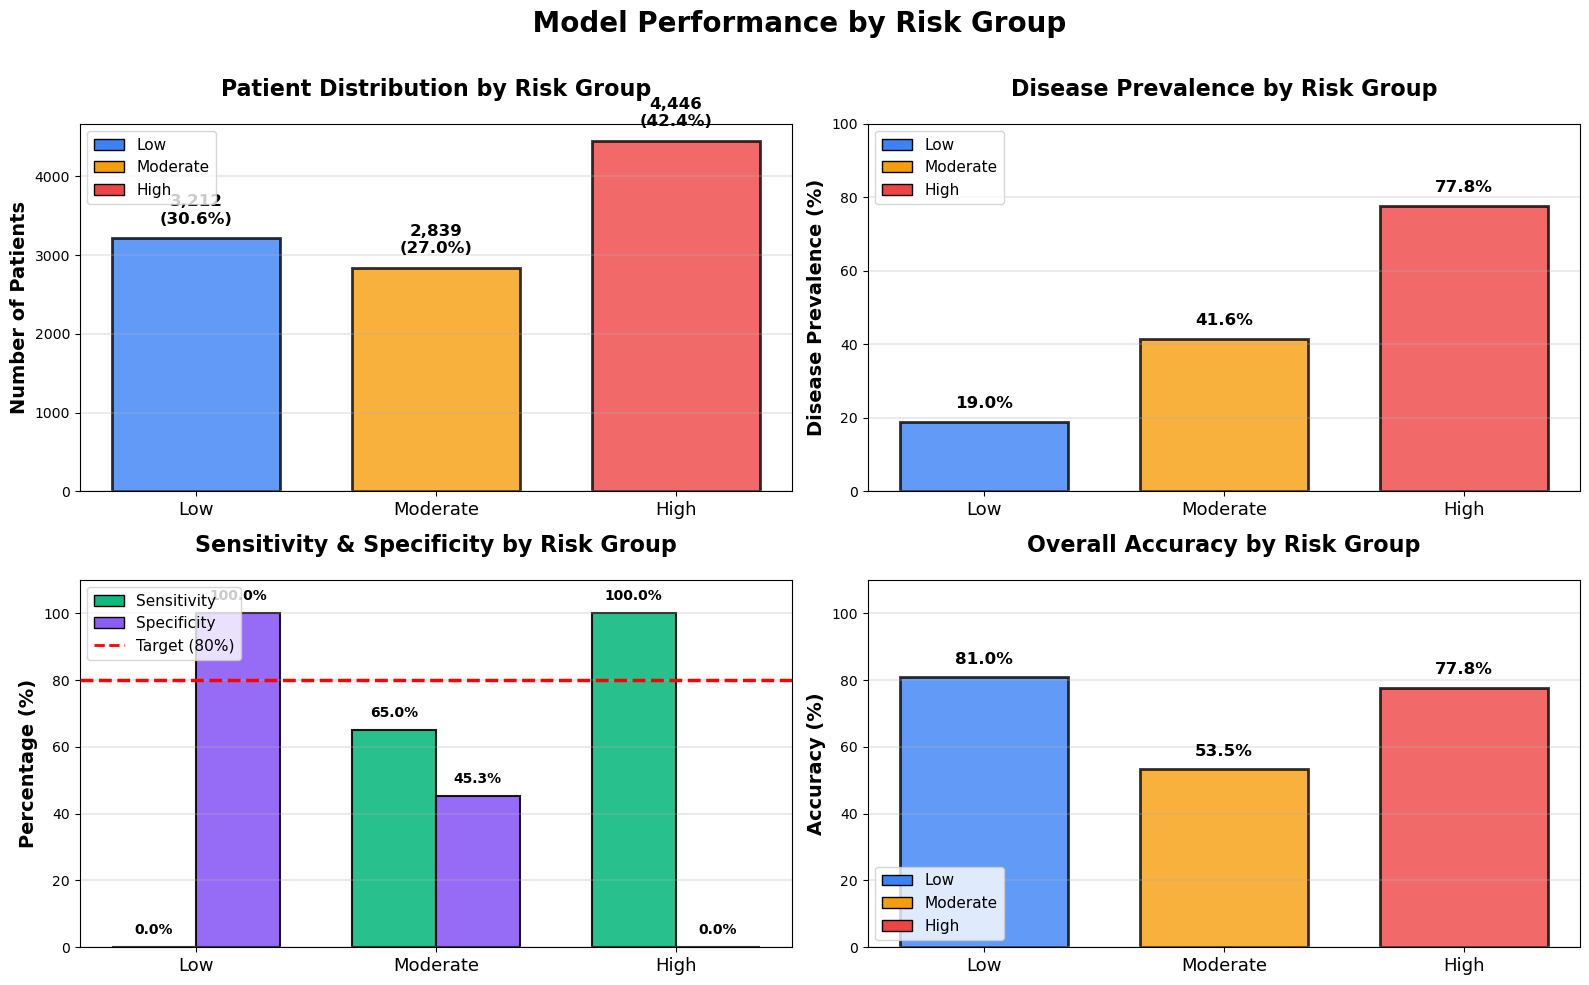

In [6]:
"""
RAI ANALYSIS #4: PERFORMANCE BY RISK GROUPS
Graph 3: Colors by metric (Sensitivity/Specificity)
Graphs 1,2,4: Colors by risk group (Low/Moderate/High)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
from sklearn.metrics import confusion_matrix

# ============================================================================
# SETUP
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("📊 PERFORMANCE BY RISK GROUPS")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1/2] Loading data...")

df_risk_profiles = pd.read_csv(METRICS_DIR / 'df_risk_profiles_updated.csv')
print(f"✓ Loaded: {len(df_risk_profiles):,} patients")

# ============================================================================
# CALCULATE METRICS
# ============================================================================
print("\n[2/2] Calculating metrics...")

metrics = []
risk_groups = ['Low', 'Moderate', 'High']

for risk_level in risk_groups:
    mask = df_risk_profiles['Risk_Level'] == risk_level
    
    if mask.sum() == 0:
        continue
    
    y_true = df_risk_profiles[mask]['Actual_Disease'].values
    y_pred = df_risk_profiles[mask]['Predicted_Disease'].values
    
    n_total = len(y_true)
    disease_rate = y_true.mean() * 100
    
    if len(np.unique(y_true)) < 2 or len(np.unique(y_pred)) < 2:
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
        if cm.size == 4:
            tn, fp, fn, tp = cm.ravel()
        else:
            tn, fp, fn, tp = 0, 0, 0, 0
    else:
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = (tp / (tp + fn) * 100) if (tp + fn) > 0 else 0
    specificity = (tn / (tn + fp) * 100) if (tn + fp) > 0 else 0
    accuracy = ((tp + tn) / n_total * 100) if n_total > 0 else 0
    
    metrics.append({
        'Risk_Level': risk_level,
        'N': n_total,
        'Disease_Rate': disease_rate,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy
    })
    
    print(f"  {risk_level:8s}: n={n_total:5,} | Disease={disease_rate:5.1f}%")

df_metrics = pd.DataFrame(metrics)

# ============================================================================
# CREATE VISUALIZATION
# ============================================================================
print("\nCreating visualization...")

# Risk group colors (for graphs 1, 2, 4)
COLORS_RISK = ['#3B82F6', '#F59E0B', '#EF4444']  # Blue, Orange, Red

# Metric colors (for graph 3)
COLOR_SENSITIVITY = '#10B981'  # Green
COLOR_SPECIFICITY = '#8B5CF6'  # Purple

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(' Model Performance by Risk Group', 
             fontsize=20, fontweight='bold', y=0.98)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

x = np.arange(len(df_metrics))
width = 0.7
width_sub = 0.35

# Legend for risk groups (graphs 1, 2, 4)
legend_risk_groups = [
    Patch(facecolor=COLORS_RISK[0], edgecolor='black', label='Low'),
    Patch(facecolor=COLORS_RISK[1], edgecolor='black', label='Moderate'),
    Patch(facecolor=COLORS_RISK[2], edgecolor='black', label='High')
]

# ============================================
# TOP LEFT: Patient Distribution (✅ RISK COLORS)
# ============================================
ax = axes[0, 0]
bars = ax.bar(x, df_metrics['N'], width, color=COLORS_RISK, 
              edgecolor='black', linewidth=2, alpha=0.8)

ax.set_ylabel('Number of Patients', fontsize=14, fontweight='bold')
ax.set_title('Patient Distribution by Risk Group', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Risk_Level'], fontsize=13)
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    pct = df_metrics.iloc[i]['N'] / df_metrics['N'].sum() * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 150,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.legend(handles=legend_risk_groups, fontsize=11, loc='upper left')

# ============================================
# TOP RIGHT: Disease Prevalence (✅ RISK COLORS)
# ============================================
ax = axes[0, 1]
bars = ax.bar(x, df_metrics['Disease_Rate'], width, color=COLORS_RISK,
              edgecolor='black', linewidth=2, alpha=0.8)

ax.set_ylabel('Disease Prevalence (%)', fontsize=14, fontweight='bold')
ax.set_title('Disease Prevalence by Risk Group', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Risk_Level'], fontsize=13)
ax.set_ylim([0, 100])
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 3,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.legend(handles=legend_risk_groups, fontsize=11, loc='upper left')

# ============================================
# BOTTOM LEFT: Sensitivity & Specificity (✅ METRIC COLORS)
# ============================================
ax = axes[1, 0]

# ✅ Use METRIC colors (all Sensitivity bars same color, all Specificity bars same color)
for i in range(3):
    sens = df_metrics.iloc[i]['Sensitivity']
    spec = df_metrics.iloc[i]['Specificity']
    
    # Sensitivity = Green, Specificity = Purple (consistent across all risk groups)
    ax.bar(i - width_sub/2, sens, width_sub, color=COLOR_SENSITIVITY, 
           edgecolor='black', linewidth=1.5, alpha=0.9)
    ax.bar(i + width_sub/2, spec, width_sub, color=COLOR_SPECIFICITY, 
           edgecolor='black', linewidth=1.5, alpha=0.9)
    
    ax.text(i - width_sub/2, sens + 3, f'{sens:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.text(i + width_sub/2, spec + 3, f'{spec:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.axhline(y=80, color='red', linestyle='--', linewidth=2.5, zorder=5)

ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_title('Sensitivity & Specificity by Risk Group', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Risk_Level'], fontsize=13)
ax.set_ylim([0, 110])
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

# ✅ Legend shows METRIC colors (not risk colors)
legend_sens_spec = [
    Patch(facecolor=COLOR_SENSITIVITY, edgecolor='black', label='Sensitivity'),
    Patch(facecolor=COLOR_SPECIFICITY, edgecolor='black', label='Specificity'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='Target (80%)')
]
ax.legend(handles=legend_sens_spec, fontsize=11, loc='upper left')

# ============================================
# BOTTOM RIGHT: Accuracy (✅ RISK COLORS)
# ============================================
ax = axes[1, 1]
bars = ax.bar(x, df_metrics['Accuracy'], width, color=COLORS_RISK,
              edgecolor='black', linewidth=2, alpha=0.8)

ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_title('Overall Accuracy by Risk Group', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Risk_Level'], fontsize=13)
ax.set_ylim([0, 110])
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 3,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.legend(handles=legend_risk_groups, fontsize=11, loc='lower left')

plt.tight_layout(rect=[0, 0, 1, 0.97])

# ============================================================================
# SAVE
# ============================================================================
output_path = FIGURES_DIR / '04_performance_by_risk_group.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")
plt.show()
plt.close()


📈 RISK SCORE DISTRIBUTION ANALYSIS

[1/3] Loading data...
✓ Loaded: 10,497 patients

[2/3] Creating visualization...


KeyError: 'Sex'

p:\projects\heart_disease_prediction\env\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  func(*args, **kwargs)
p:\projects\heart_disease_prediction\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


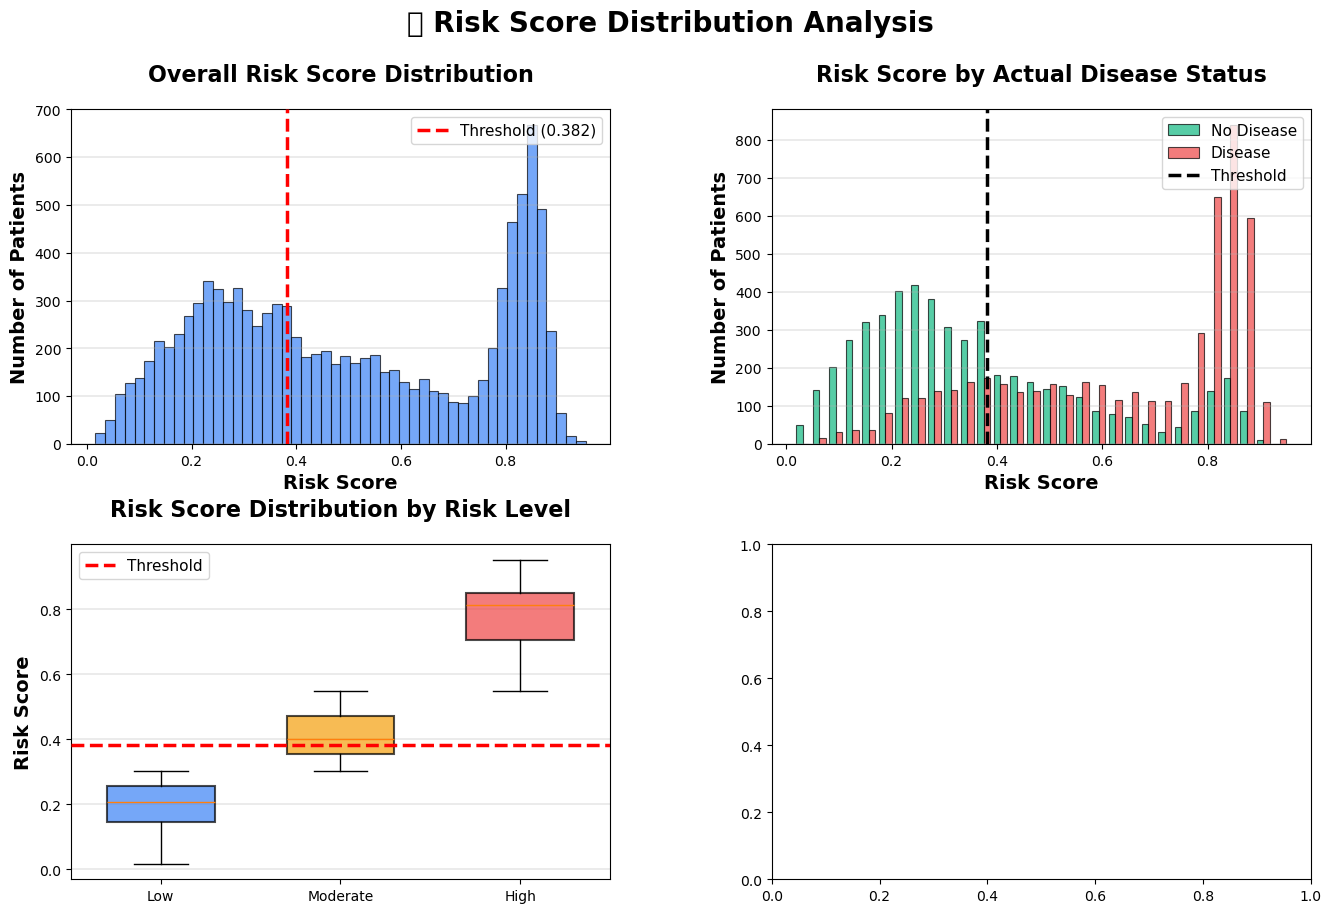

In [9]:
"""
RAI ANALYSIS #5: RISK SCORE DISTRIBUTION ANALYSIS (FIXED)
Distribution of risk scores across different patient groups
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ============================================================================
# SETUP
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("📈 RISK SCORE DISTRIBUTION ANALYSIS")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1/3] Loading data...")

df_risk_profiles = pd.read_csv(METRICS_DIR / 'df_risk_profiles_updated.csv')
X_test_full = pd.read_parquet(DATA_DIR / 'X_test.parquet')

# Merge demographics
X_test_indexed = X_test_full.reset_index(drop=True)
X_test_indexed['Patient_Index'] = X_test_indexed.index
df_test = df_risk_profiles.merge(X_test_indexed[['Patient_Index', 'Sex', 'Age_Years']], 
                                   on='Patient_Index', how='left')

print(f"✓ Loaded: {len(df_test):,} patients")

# ============================================================================
# CREATE VISUALIZATION (2×2 GRID)
# ============================================================================
print("\n[2/3] Creating visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📈 Risk Score Distribution Analysis', 
             fontsize=20, fontweight='bold', y=0.98)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

threshold = df_test['Threshold'].iloc[0]

# ============================================
# TOP LEFT: Overall Risk Score Distribution
# ============================================
ax = axes[0, 0]

ax.hist(df_test['Risk_Score'], bins=50, color='#3B82F6', 
        edgecolor='black', linewidth=0.8, alpha=0.7)

ax.axvline(threshold, color='red', linestyle='--', linewidth=2.5, 
           label=f'Threshold ({threshold:.3f})', zorder=5)

ax.set_xlabel('Risk Score', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=14, fontweight='bold')
ax.set_title('Overall Risk Score Distribution', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right')
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

# ============================================
# TOP RIGHT: Risk Score by Actual Disease Status
# ============================================
ax = axes[0, 1]

no_disease = df_test[df_test['Actual_Disease'] == 0]['Risk_Score']
has_disease = df_test[df_test['Actual_Disease'] == 1]['Risk_Score']

ax.hist([no_disease, has_disease], bins=30, 
        color=['#10B981', '#EF4444'], 
        label=['No Disease', 'Disease'], 
        edgecolor='black', linewidth=0.8, alpha=0.7)

ax.axvline(threshold, color='black', linestyle='--', linewidth=2.5, 
           label='Threshold', zorder=5)

ax.set_xlabel('Risk Score', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=14, fontweight='bold')
ax.set_title('Risk Score by Actual Disease Status', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right')
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

# ============================================
# BOTTOM LEFT: Risk Score by Risk Level
# ============================================
ax = axes[1, 0]

low_risk = df_test[df_test['Risk_Level'] == 'Low']['Risk_Score']
mod_risk = df_test[df_test['Risk_Level'] == 'Moderate']['Risk_Score']
high_risk = df_test[df_test['Risk_Level'] == 'High']['Risk_Score']

bp = ax.boxplot([low_risk, mod_risk, high_risk], 
                 labels=['Low', 'Moderate', 'High'],
                 patch_artist=True, widths=0.6)

colors = ['#3B82F6', '#F59E0B', '#EF4444']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_linewidth(1.5)

ax.axhline(threshold, color='red', linestyle='--', linewidth=2.5, 
           label='Threshold', zorder=5)

ax.set_ylabel('Risk Score', fontsize=14, fontweight='bold')
ax.set_title('Risk Score Distribution by Risk Level', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

# ============================================
# BOTTOM RIGHT: Risk Score by Gender
# ============================================
ax = axes[1, 1]

female_risk = df_test[df_test['Sex'] == 'Female']['Risk_Score']
male_risk = df_test[df_test['Sex'] == 'Male']['Risk_Score']

bp_gender = ax.boxplot([female_risk, male_risk], 
                        labels=['Female', 'Male'],
                        patch_artist=True, widths=0.5)

colors_gender = ['#FF6B9D', '#4ECDC4']
for patch, color in zip(bp_gender['boxes'], colors_gender):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_linewidth(1.5)

ax.axhline(threshold, color='red', linestyle='--', linewidth=2.5, 
           label='Threshold', zorder=5)

ax.set_ylabel('Risk Score', fontsize=14, fontweight='bold')
ax.set_title('Risk Score Distribution by Gender', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(alpha=0.3, axis='y', linewidth=1.2)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# ============================================================================
# SAVE
# ============================================================================
output_path = FIGURES_DIR / '05_risk_score_distribution.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")
plt.show()
plt.close()

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================
print("\n[3/3] Summary statistics...")

print("\n" + "="*80)
print("RISK SCORE DISTRIBUTION SUMMARY")
print("="*80)

print(f"\nOverall Statistics:")
print(f"  Mean Risk Score:   {df_test['Risk_Score'].mean():.4f}")
print(f"  Median Risk Score: {df_test['Risk_Score'].median():.4f}")
print(f"  Std Dev:           {df_test['Risk_Score'].std():.4f}")
print(f"  Min:               {df_test['Risk_Score'].min():.4f}")
print(f"  Max:               {df_test['Risk_Score'].max():.4f}")
print(f"  Threshold:         {threshold:.4f}")

print(f"\nBy Actual Disease Status:")
print(f"  No Disease:  Mean={no_disease.mean():.4f}, Median={no_disease.median():.4f}")
print(f"  Has Disease: Mean={has_disease.mean():.4f}, Median={has_disease.median():.4f}")

print(f"\nBy Risk Level:")
print(f"  Low:      Mean={low_risk.mean():.4f}, Median={low_risk.median():.4f}")
print(f"  Moderate: Mean={mod_risk.mean():.4f}, Median={mod_risk.median():.4f}")
print(f"  High:     Mean={high_risk.mean():.4f}, Median={high_risk.median():.4f}")

print(f"\nBy Gender:")
print(f"  Female: Mean={female_risk.mean():.4f}, Median={female_risk.median():.4f}")
print(f"  Male:   Mean={male_risk.mean():.4f}, Median={male_risk.median():.4f}")

print("="*80 + "\n")


📐 CALIBRATION ANALYSIS

[1/3] Loading data...
✓ Loaded: 20,993 patients

[2/3] Creating calibration curves...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9376\2089082759.py:196: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.97])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9376\2089082759.py:202: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')



✅ Saved: p:\projects\heart_disease_prediction\reports\modeling\rai reports\06_calibration_analysis.png


p:\projects\heart_disease_prediction\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


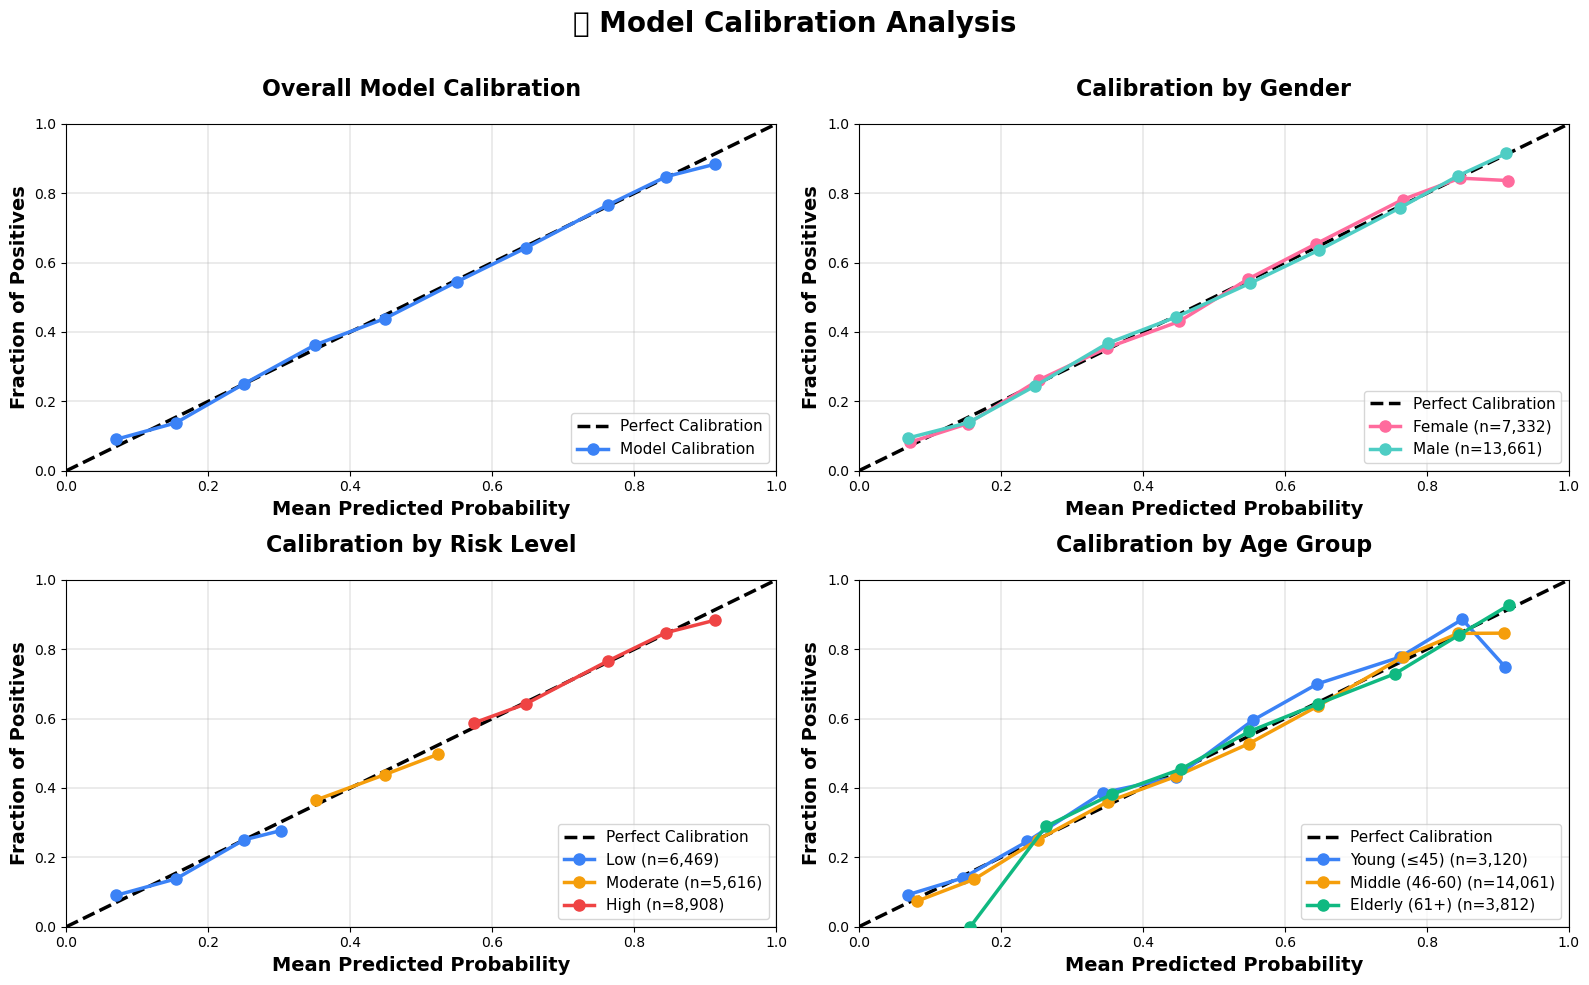


[3/3] Calculating calibration metrics...

CALIBRATION METRICS

Overall Calibration:
  Brier Score:  0.1803 (lower is better, range 0-1)
  Log Loss:     0.5409 (lower is better)

By Gender:
  Female: Brier=0.1813, LogLoss=0.5434
  Male  : Brier=0.1798, LogLoss=0.5395

By Risk Level:
  Low     : Brier=0.1521, LogLoss=0.4774
  Moderate: Brier=0.2395, LogLoss=0.6719
  High    : Brier=0.1635, LogLoss=0.5043


In [8]:
"""
RAI ANALYSIS #6: CALIBRATION ANALYSIS
Assessing reliability of predicted probabilities across subgroups
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.calibration import calibration_curve

# ============================================================================
# SETUP
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("📐 CALIBRATION ANALYSIS")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================
print("\n[1/3] Loading data...")

df_risk_profiles = pd.read_parquet(METRICS_DIR / 'df_risk_profiles.parquet')
X_test_full = pd.read_parquet(DATA_DIR / 'X_test.parquet')

# Merge demographics
X_test_indexed = X_test_full.reset_index(drop=True)
X_test_indexed['Patient_Index'] = X_test_indexed.index
df_test = df_risk_profiles.merge(X_test_indexed[['Patient_Index', 'Sex', 'Age_Years']], 
                                   on='Patient_Index', how='left')

df_test['Sex'] = df_test['Sex'].map({0: 'Female', 1: 'Male'})

print(f"✓ Loaded: {len(df_test):,} patients")

# ============================================================================
# CREATE VISUALIZATION
# ============================================================================
print("\n[2/3] Creating calibration curves...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📐 Model Calibration Analysis', 
             fontsize=20, fontweight='bold', y=0.98)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

# ============================================
# TOP LEFT: Overall Calibration
# ============================================
ax = axes[0, 0]

try:
    fraction_of_positives, mean_predicted_value = calibration_curve(
        df_test['Actual_Disease'], 
        df_test['Risk_Score'], 
        n_bins=10, 
        strategy='uniform'
    )
    
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Perfect Calibration', zorder=5)
    ax.plot(mean_predicted_value, fraction_of_positives, 'o-', 
            color='#3B82F6', linewidth=2.5, markersize=8, 
            label='Model Calibration', zorder=10)
    
    ax.set_xlabel('Mean Predicted Probability', fontsize=14, fontweight='bold')
    ax.set_ylabel('Fraction of Positives', fontsize=14, fontweight='bold')
    ax.set_title('Overall Model Calibration', fontsize=16, fontweight='bold', pad=20)
    ax.legend(fontsize=11, loc='lower right')
    ax.grid(alpha=0.3, linewidth=1.2)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    
except Exception as e:
    ax.text(0.5, 0.5, f'Calibration Error: {str(e)}', 
            ha='center', va='center', fontsize=12)

# ============================================
# TOP RIGHT: Calibration by Gender
# ============================================
ax = axes[0, 1]

ax.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Perfect Calibration', zorder=5)

colors_gender = {'Female': '#FF6B9D', 'Male': '#4ECDC4'}

for sex in ['Female', 'Male']:
    mask = df_test['Sex'] == sex
    if mask.sum() > 0:
        try:
            y_true = df_test[mask]['Actual_Disease']
            y_prob = df_test[mask]['Risk_Score']
            
            fraction_of_positives, mean_predicted_value = calibration_curve(
                y_true, y_prob, n_bins=10, strategy='uniform'
            )
            
            ax.plot(mean_predicted_value, fraction_of_positives, 'o-', 
                    color=colors_gender[sex], linewidth=2.5, markersize=8,
                    label=f'{sex} (n={mask.sum():,})', zorder=10)
        except:
            pass

ax.set_xlabel('Mean Predicted Probability', fontsize=14, fontweight='bold')
ax.set_ylabel('Fraction of Positives', fontsize=14, fontweight='bold')
ax.set_title('Calibration by Gender', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='lower right')
ax.grid(alpha=0.3, linewidth=1.2)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# ============================================
# BOTTOM LEFT: Calibration by Risk Level
# ============================================
ax = axes[1, 0]

ax.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Perfect Calibration', zorder=5)

colors_risk = {'Low': '#3B82F6', 'Moderate': '#F59E0B', 'High': '#EF4444'}

for risk_level in ['Low', 'Moderate', 'High']:
    mask = df_test['Risk_Level'] == risk_level
    if mask.sum() > 0:
        try:
            y_true = df_test[mask]['Actual_Disease']
            y_prob = df_test[mask]['Risk_Score']
            
            fraction_of_positives, mean_predicted_value = calibration_curve(
                y_true, y_prob, n_bins=10, strategy='uniform'
            )
            
            ax.plot(mean_predicted_value, fraction_of_positives, 'o-', 
                    color=colors_risk[risk_level], linewidth=2.5, markersize=8,
                    label=f'{risk_level} (n={mask.sum():,})', zorder=10)
        except:
            pass

ax.set_xlabel('Mean Predicted Probability', fontsize=14, fontweight='bold')
ax.set_ylabel('Fraction of Positives', fontsize=14, fontweight='bold')
ax.set_title('Calibration by Risk Level', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='lower right')
ax.grid(alpha=0.3, linewidth=1.2)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# ============================================
# BOTTOM RIGHT: Calibration by Age Group
# ============================================
ax = axes[1, 1]

ax.plot([0, 1], [0, 1], 'k--', linewidth=2.5, label='Perfect Calibration', zorder=5)

# Create age groups
df_test['Age_Group'] = pd.cut(df_test['Age_Years'], 
                               bins=[0, 45, 60, 100], 
                               labels=['Young (≤45)', 'Middle (46-60)', 'Elderly (61+)'])

colors_age = {'Young (≤45)': '#3B82F6', 'Middle (46-60)': '#F59E0B', 'Elderly (61+)': '#10B981'}

for age_group in ['Young (≤45)', 'Middle (46-60)', 'Elderly (61+)']:
    mask = df_test['Age_Group'] == age_group
    if mask.sum() > 0:
        try:
            y_true = df_test[mask]['Actual_Disease']
            y_prob = df_test[mask]['Risk_Score']
            
            fraction_of_positives, mean_predicted_value = calibration_curve(
                y_true, y_prob, n_bins=10, strategy='uniform'
            )
            
            ax.plot(mean_predicted_value, fraction_of_positives, 'o-', 
                    color=colors_age[age_group], linewidth=2.5, markersize=8,
                    label=f'{age_group} (n={mask.sum():,})', zorder=10)
        except:
            pass

ax.set_xlabel('Mean Predicted Probability', fontsize=14, fontweight='bold')
ax.set_ylabel('Fraction of Positives', fontsize=14, fontweight='bold')
ax.set_title('Calibration by Age Group', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='lower right')
ax.grid(alpha=0.3, linewidth=1.2)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.tight_layout(rect=[0, 0, 1, 0.97])

# ============================================================================
# SAVE
# ============================================================================
output_path = FIGURES_DIR / '06_calibration_analysis.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")
plt.show()
plt.close()

# ============================================================================
# CALIBRATION METRICS
# ============================================================================
print("\n[3/3] Calculating calibration metrics...")

from sklearn.metrics import brier_score_loss, log_loss

print("\n" + "="*80)
print("CALIBRATION METRICS")
print("="*80)

# Overall calibration
overall_brier = brier_score_loss(df_test['Actual_Disease'], df_test['Risk_Score'])
overall_logloss = log_loss(df_test['Actual_Disease'], df_test['Risk_Score'])

print(f"\nOverall Calibration:")
print(f"  Brier Score:  {overall_brier:.4f} (lower is better, range 0-1)")
print(f"  Log Loss:     {overall_logloss:.4f} (lower is better)")

# By gender
print(f"\nBy Gender:")
for sex in ['Female', 'Male']:
    mask = df_test['Sex'] == sex
    if mask.sum() > 0:
        brier = brier_score_loss(df_test[mask]['Actual_Disease'], df_test[mask]['Risk_Score'])
        logloss = log_loss(df_test[mask]['Actual_Disease'], df_test[mask]['Risk_Score'])
        print(f"  {sex:6s}: Brier={brier:.4f}, LogLoss={logloss:.4f}")

# By risk level
print(f"\nBy Risk Level:")
for risk_level in ['Low', 'Moderate', 'High']:
    mask = df_test['Risk_Level'] == risk_level
    if mask.sum() > 0:
        brier = brier_score_loss(df_test[mask]['Actual_Disease'], df_test[mask]['Risk_Score'])
        logloss = log_loss(df_test[mask]['Actual_Disease'], df_test[mask]['Risk_Score'])
        print(f"  {risk_level:8s}: Brier={brier:.4f}, LogLoss={logloss:.4f}")

In [7]:
import pandas as pd
from pathlib import Path

# Path setup
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent
METRICS_DIR = PROJECT_ROOT / 'reports' / 'modeling' / 'metrics'

df = pd.read_parquet(METRICS_DIR / 'df_risk_profiles.parquet')

# Clinical BP classification (standard adult cutoffs, systolic takes precedence)
def classify_bp(sbp, dbp):
    if sbp < 120 and dbp < 80:
        return 'Normal'
    elif 120 <= sbp < 130 and dbp < 80:
        return 'Elevated'
    elif (130 <= sbp < 140) or (80 <= dbp < 90):
        return 'Stage 1'
    elif sbp >= 140 or dbp >= 90:
        return 'Stage 2'
    else:
        return 'Other'

df['BP_Category'] = [classify_bp(sbp, dbp) for sbp, dbp in zip(df['Systolic_BP'], df['Diastolic_BP'])]
df['BP_Category'] = pd.Categorical(df['BP_Category'], 
    categories=['Normal', 'Elevated', 'Stage 1', 'Stage 2', 'Other'])

# Age Group (clinical bins)
age_bins = [0, 45, 60, 120]
age_labels = ['<45', '45-60', '>60']
df['Age_Group'] = pd.cut(df['Age_Years'], bins=age_bins, labels=age_labels, right=False)
df['Age_Group'] = df['Age_Group'].astype('category')

# BMI Group (WHO category)
bmi_bins = [0, 24.9, 29.9, 100]
bmi_labels = ['Normal', 'Overweight', 'Obese']
df['BMI_Group'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=True)
df['BMI_Group'] = df['BMI_Group'].astype('category')

# Drop raw features
df_updated = df.drop(columns=['Systolic_BP', 'Diastolic_BP', 'Age_Years', 'BMI'])

# Ensure categorical/integer dtypes for plotting and modeling
for col in ['Sex', 'Cholesterol_Level', 'Glucose_Level', 'Smoking_Status', 
            'Alcohol_Intake', 'Physical_Activity', 'Actual_Disease', 'Predicted_Disease']:
    if col in df_updated.columns:
        df_updated[col] = df_updated[col].astype('category')

df_updated['Risk_Level'] = df_updated['Risk_Level'].astype('category')

# Save result
df_updated.to_parquet(METRICS_DIR / 'df_risk_profiles_updated.parquet', index=False)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Patient_Index             10497 non-null  int32   
 1   Risk_Score                10497 non-null  float64 
 2   Risk_Level                10497 non-null  category
 3   Threshold                 10497 non-null  float64 
 4   Predicted_Disease         10497 non-null  category
 5   Actual_Disease            10497 non-null  category
 6   Correct                   10497 non-null  int32   
 7   Sex                       10497 non-null  category
 8   Cholesterol_Level         10497 non-null  category
 9   Glucose_Level             10497 non-null  category
 10  Smoking_Status            10497 non-null  category
 11  Alcohol_Intake            10497 non-null  category
 12  Physical_Activity         10497 non-null  category
 13  Systolic_Age_risk         10497 non-null  floa

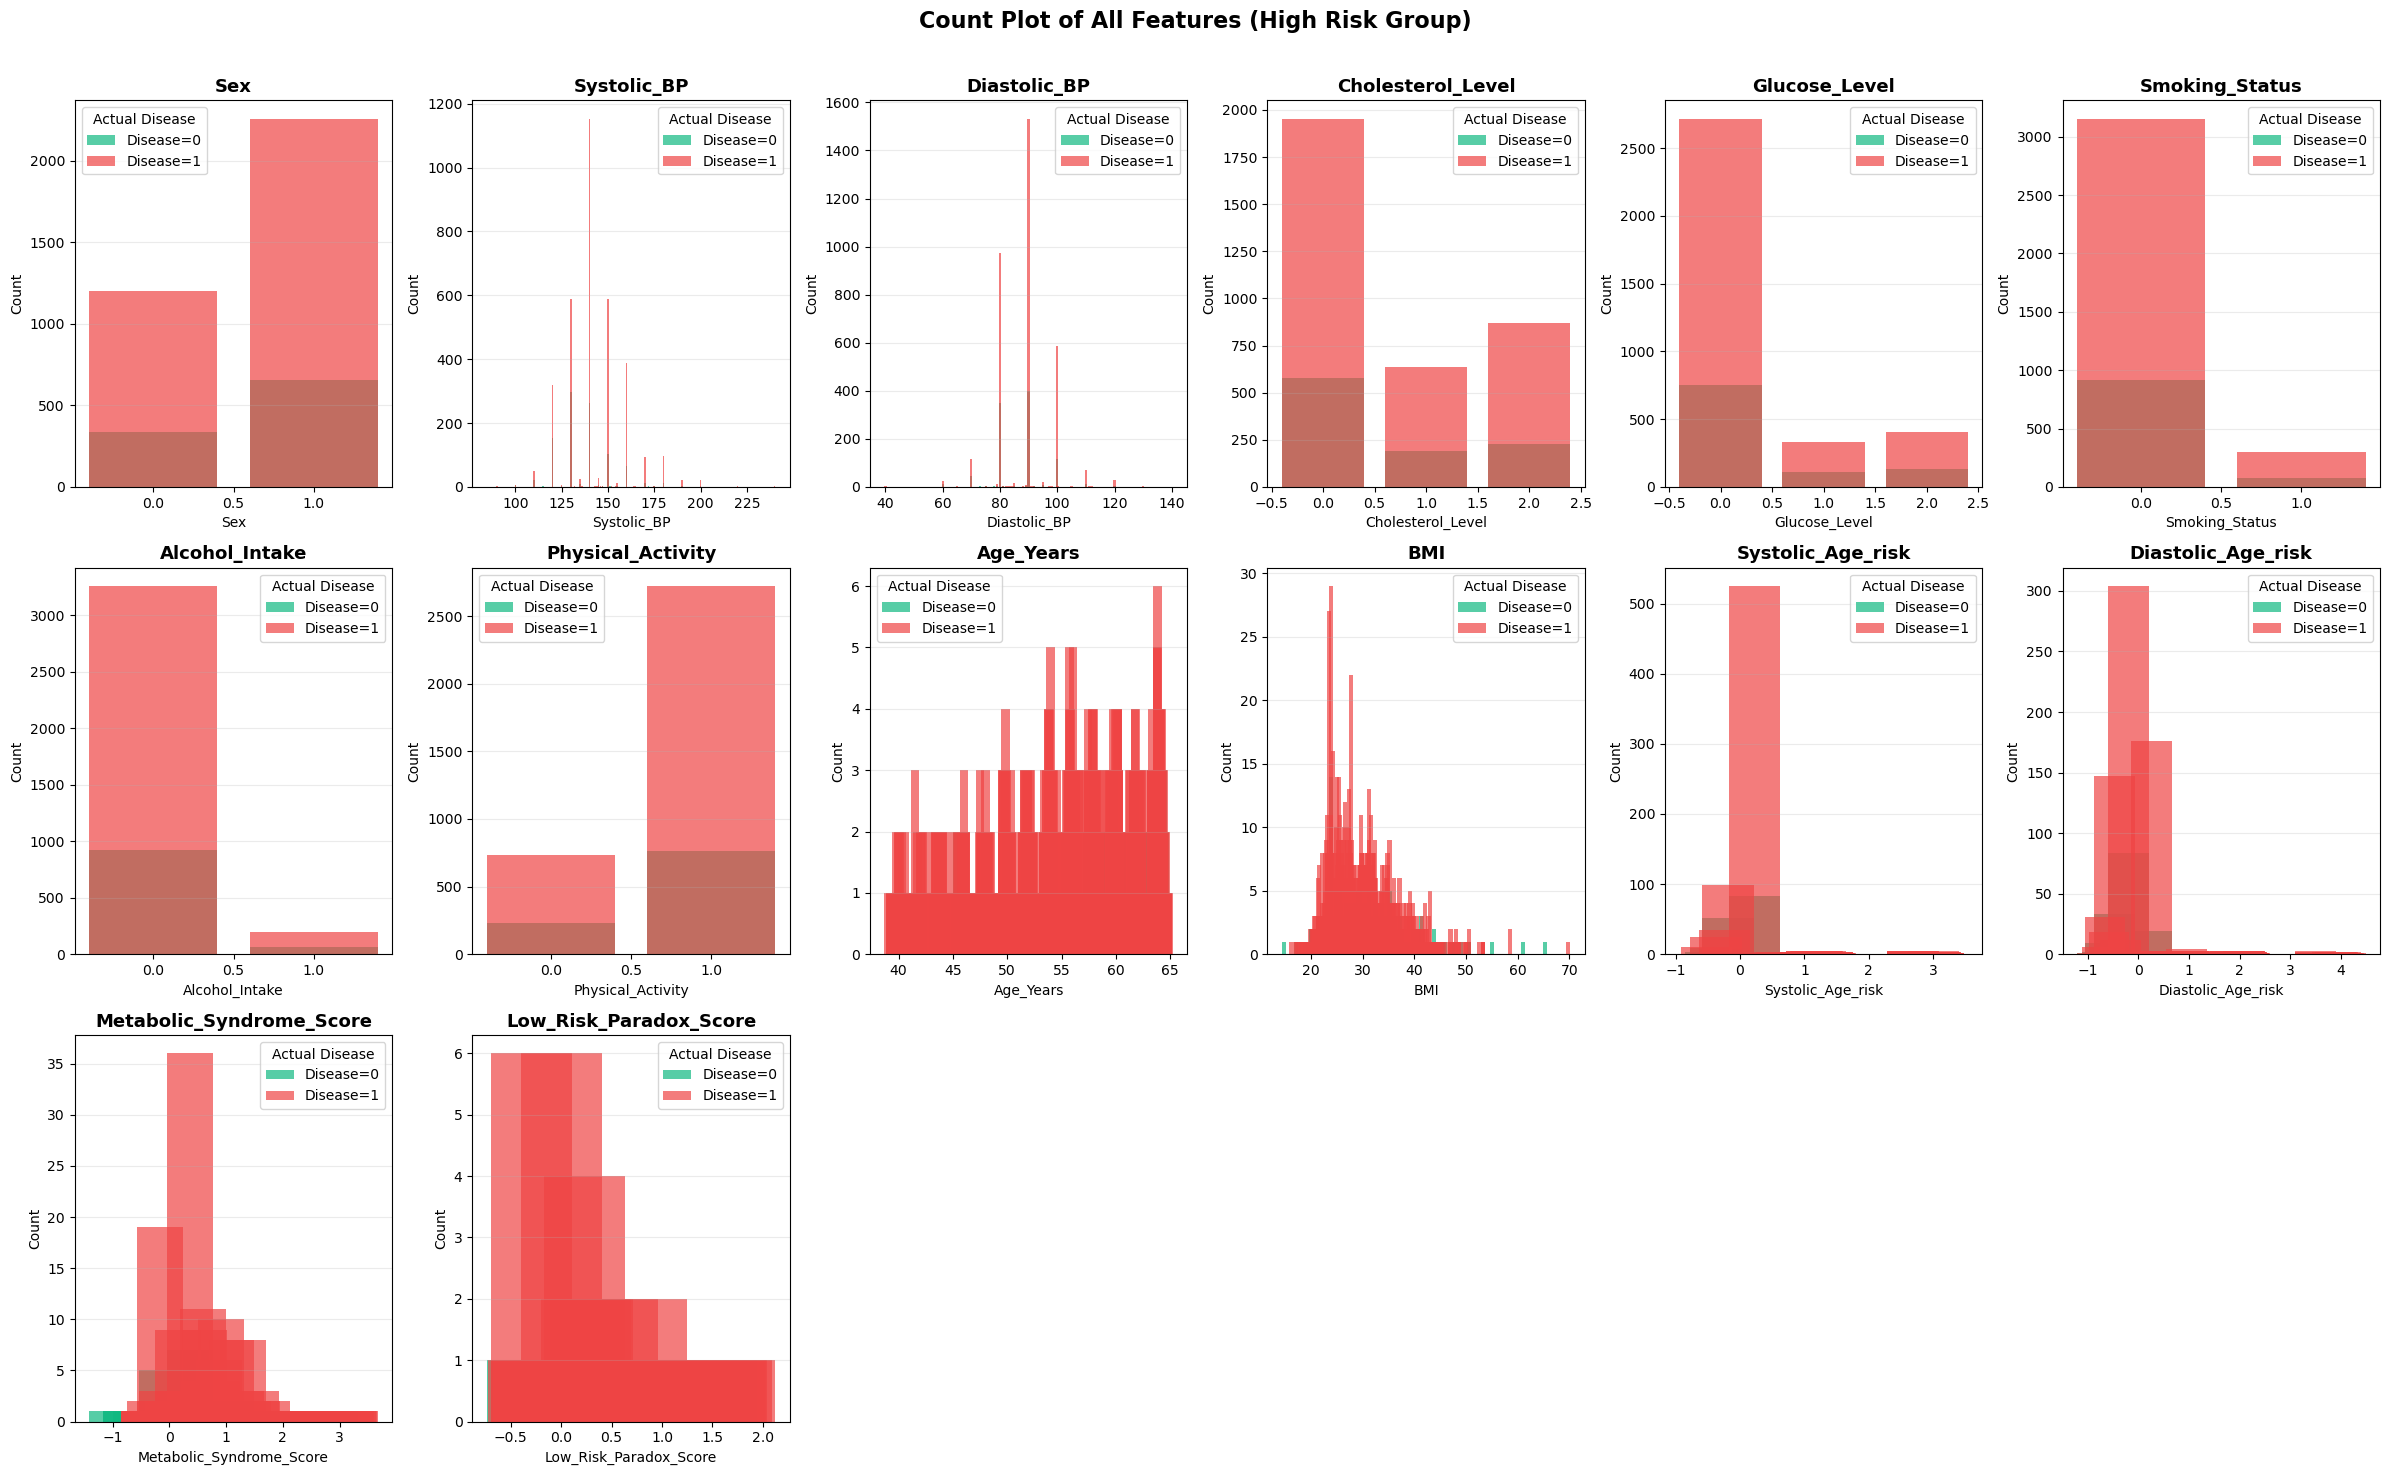

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Path setup
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent
METRICS_DIR = PROJECT_ROOT / 'reports' / 'modeling' / 'metrics'
FIGURES_DIR = PROJECT_ROOT / 'reports' / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

# Load high risk profiles from CSV
df_risk_profiles_high = pd.read_parquet(METRICS_DIR / 'df_risk_profiles_updated.parquet')


# Exclude non-feature columns
exclude_cols = ['Patient_Index', 'Risk_Level', 'Actual_Disease', 'Predicted_Disease', 'Threshold', 'Risk_Score', 'Correct']
feature_cols = [col for col in df_risk_profiles_high.columns if col not in exclude_cols]

# Determine subplot layout (max 6 features per row for legibility)
n_features = len(feature_cols)
n_cols = min(n_features, 6)
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 5*n_rows), squeeze=False)
axes = axes.flatten()

for i, feature in enumerate(feature_cols):
    ax = axes[i]
    for val, color in zip([0, 1], ['#10B981', '#EF4444']):
        counts = df_risk_profiles_high[df_risk_profiles_high['Actual_Disease'] == val][feature].value_counts().sort_index()
        ax.bar(counts.index, counts.values, label=f'Disease={val}', alpha=0.7, color=color)
    ax.set_title(feature, fontsize=13, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Actual Disease')
    ax.grid(axis='y', alpha=0.25)

# Remove extra empty subplots, if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Count Plot of All Features (High Risk Group)', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(FIGURES_DIR / 'high_risk_features_countplot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


📊 COMPREHENSIVE ML ANALYSIS DASHBOARD

[1/4] Loading model and data...
✓ Loaded: 10,497 patients for analysis

[2/4] Preparing error analysis data...

[3/4] Computing SHAP values...

[4/4] Preparing fairness data...

✓ BP Group Distribution:
  Elevated: 442 patients (4.2%)
  Normal: 1,473 patients (14.0%)
  Stage 1: 4,904 patients (46.7%)
  Stage 2: 3,678 patients (35.0%)

Creating comprehensive dashboard...


NameError: name 'calculate_fairness_metrics' is not defined

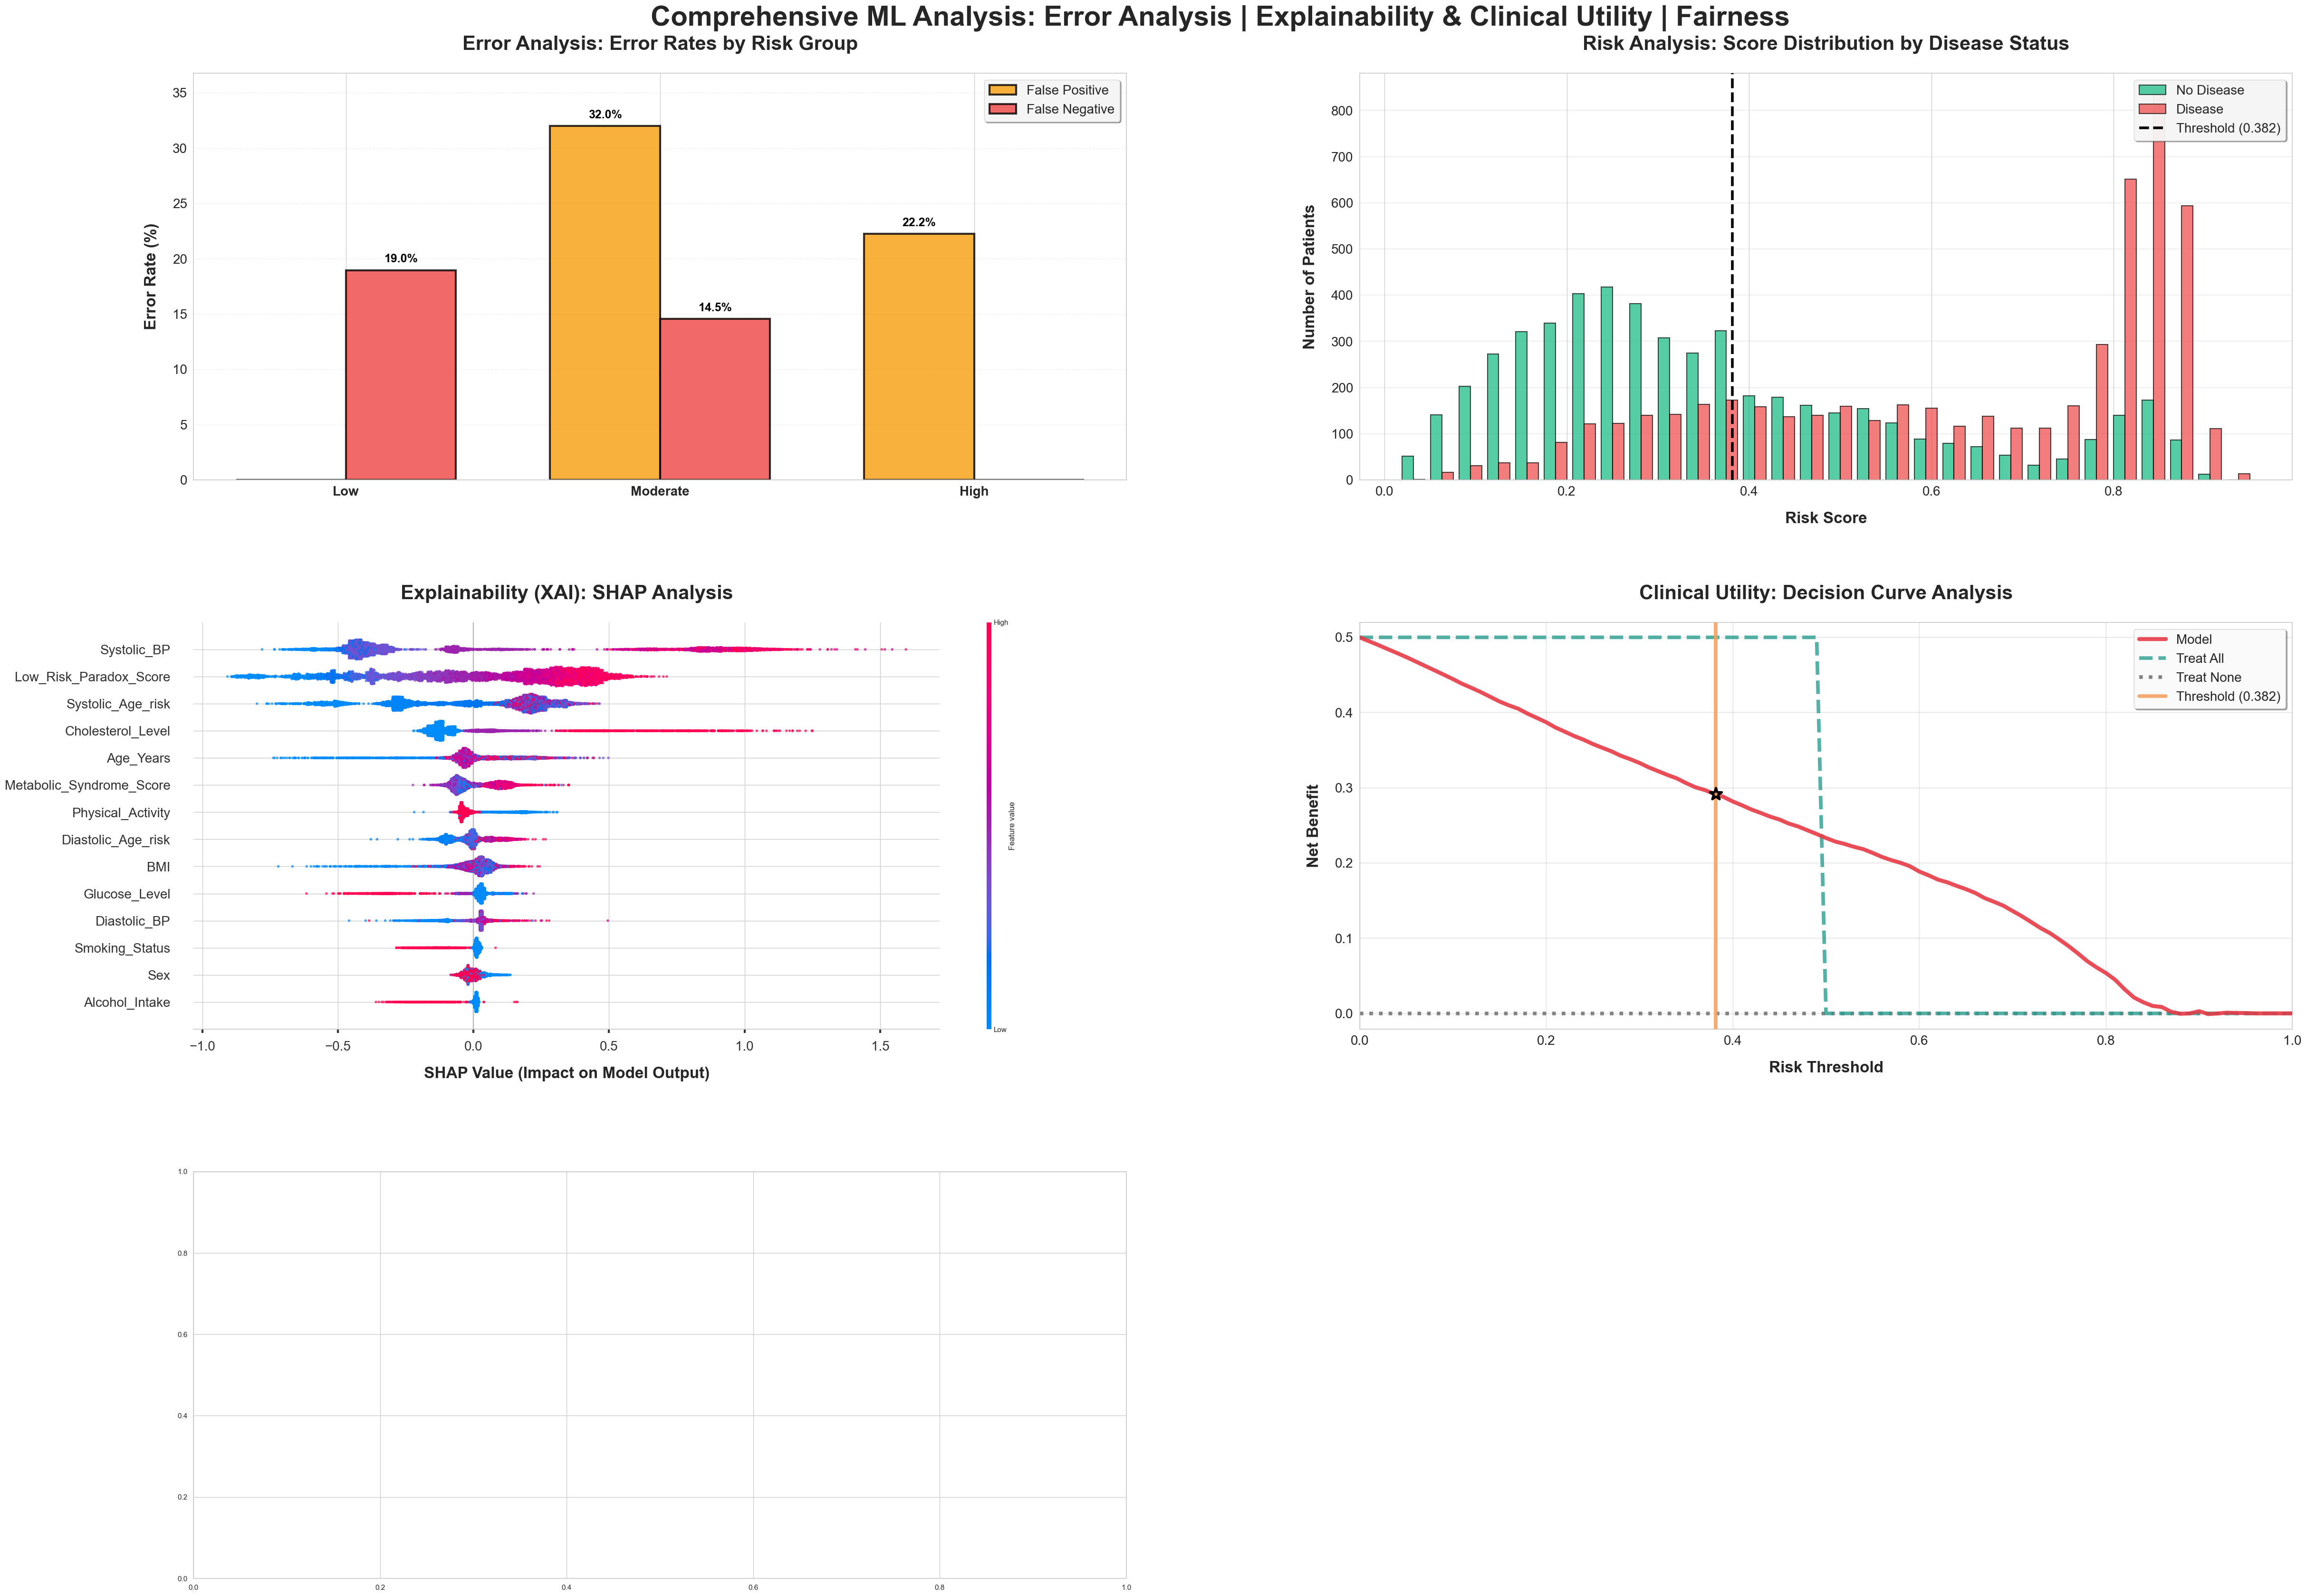

In [10]:
"""
COMPREHENSIVE ML ANALYSIS DASHBOARD
3-Row Layout: Error Analysis | Explainability & Utility | Fairness
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
import shap
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# SETUP & DATA LOADING
# ============================================================================
PROJECT_ROOT = Path.cwd()
while PROJECT_ROOT.name != 'heart_disease_prediction' and PROJECT_ROOT.parent != PROJECT_ROOT:
    PROJECT_ROOT = PROJECT_ROOT.parent

ARTIFACTS_DIR = PROJECT_ROOT / 'artifacts'
DATA_DIR = ARTIFACTS_DIR / 'split data sets'
REPORTS_DIR = PROJECT_ROOT / 'reports' / 'modeling'
METRICS_DIR = REPORTS_DIR / 'metrics'
FIGURES_DIR = REPORTS_DIR / 'rai reports'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("\n" + "="*80)
print("📊 COMPREHENSIVE ML ANALYSIS DASHBOARD")
print("="*80)

# Load model and data
print("\n[1/4] Loading model and data...")
package = joblib.load(ARTIFACTS_DIR / 'model' / 'model_package.pkl')
model = package['base_model']
threshold = package['threshold']

# Load risk profiles and test data
df_risk_profiles = pd.read_parquet(METRICS_DIR / 'df_risk_profiles.parquet')
X_test_full = pd.read_parquet(DATA_DIR / 'X_test.parquet')
y_test_full = pd.read_parquet(DATA_DIR / 'y_test.parquet').iloc[:, 0].values

# Merge for error analysis
X_test_indexed = X_test_full.reset_index(drop=True)
X_test_indexed['Patient_Index'] = X_test_indexed.index
df_test = df_risk_profiles.merge(X_test_indexed, on='Patient_Index', how='left')

# Prepare for SHAP
X_cal, X_test, y_cal, y_test = train_test_split(
    X_test_full, y_test_full, test_size=0.5, stratify=y_test_full, random_state=42
)

print(f"✓ Loaded: {len(df_test):,} patients for analysis")

# ============================================================================
# ERROR ANALYSIS DATA
# ============================================================================
print("\n[2/4] Preparing error analysis data...")

# Classify errors
df_test['Error_Type'] = 'Correct'
df_test.loc[(df_test['Actual_Disease'] == 0) & (df_test['Predicted_Disease'] == 1), 'Error_Type'] = 'False Positive'
df_test.loc[(df_test['Actual_Disease'] == 1) & (df_test['Predicted_Disease'] == 0), 'Error_Type'] = 'False Negative'

error_counts = df_test['Error_Type'].value_counts()
error_by_risk = pd.crosstab(df_test['Risk_Level'], df_test['Error_Type'], normalize='index') * 100

# Disease status data
no_disease = df_test[df_test['Actual_Disease'] == 0]['Risk_Score']
has_disease = df_test[df_test['Actual_Disease'] == 1]['Risk_Score']

# ============================================================================
# SHAP & MODEL DATA
# ============================================================================
print("\n[3/4] Computing SHAP values...")

# Compute SHAP values
sample_size = min(6000, len(X_test))
X_sample = X_test.sample(n=sample_size, random_state=42).astype('float32')
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    shap_values_pos = shap_values[1]
elif len(shap_values.shape) == 3:
    shap_values_pos = shap_values[:, :, 1]
else:
    shap_values_pos = shap_values

# Predictions for DCA
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype(int)
n_total = len(y_test)
prevalence = y_test.mean()

def calculate_net_benefit(y_true, y_proba, threshold, n_total):
    """Calculate net benefit for decision curve analysis"""
    if threshold == 0:
        return y_true.mean()
    if threshold == 1:
        return 0.0
    
    y_pred = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    cost_ratio = threshold / (1 - threshold)
    net_benefit = (tp / n_total) - (fp / n_total) * cost_ratio
    
    return net_benefit

# ============================================================================
# FAIRNESS DATA
# ============================================================================
print("\n[4/4] Preparing fairness data...")

gender = X_test['Sex'].values if 'Sex' in X_test.columns else None
age = X_test['Age_Years'].values if 'Age_Years' in X_test.columns else None
systolic_bp = X_test['Systolic_BP'].values if 'Systolic_BP' in X_test.columns else None
diastolic_bp = X_test['Diastolic_BP'].values if 'Diastolic_BP' in X_test.columns else None

# FIXED: Create BP groups using both systolic and diastolic with more flexible approach
def categorize_blood_pressure(systolic, diastolic):
    """Categorize blood pressure based on AHA/ACC guidelines using both systolic and diastolic"""
    # Handle any potential NaN values
    if pd.isna(systolic) or pd.isna(diastolic):
        return 'Undefined'
    
    # Stage 2 Hypertension: Either value meets criteria
    if systolic >= 140 or diastolic >= 90:
        return 'Stage 2'
    # Stage 1 Hypertension: Either value meets criteria  
    elif (systolic >= 130 and systolic < 140) or (diastolic >= 80 and diastolic < 90):
        return 'Stage 1'
    # Elevated: Only systolic meets criteria
    elif systolic >= 120 and systolic < 130 and diastolic < 80:
        return 'Elevated'
    # Normal: Both values in normal range
    elif systolic < 120 and diastolic < 80:
        return 'Normal'
    else:
        return 'Undefined'

if systolic_bp is not None and diastolic_bp is not None:
    bp_groups = []
    for sys, dia in zip(systolic_bp, diastolic_bp):
        bp_groups.append(categorize_blood_pressure(sys, dia))
    bp_groups_array = pd.Series(bp_groups, index=X_test.index)
    
    # Debug: Print BP group distribution
    bp_distribution = pd.Series(bp_groups).value_counts().sort_index()
    print(f"\n✓ BP Group Distribution:")
    for bp_group, count in bp_distribution.items():
        print(f"  {bp_group}: {count:,} patients ({count/len(bp_groups)*100:.1f}%)")
else:
    bp_groups_array = None
    print("⚠️  BP data not available")

# ============================================================================
# CREATE 3-ROW DASHBOARD - INCREASED SIZE
# ============================================================================
print("\nCreating comprehensive dashboard...")

# INCREASED FIGURE SIZE: from (42, 30) to (48, 36) - 14% larger
fig = plt.figure(figsize=(48, 36))
fig.suptitle('Comprehensive ML Analysis: Error Analysis | Explainability & Clinical Utility | Fairness', 
             fontsize=42, fontweight='bold', y=0.98)  # Increased font size

# Create 3x2 grid with more spacing
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.25,  # Increased hspace from 0.25 to 0.35
                      top=0.94, bottom=0.06, left=0.05, right=0.97)  # Adjusted margins

# ============================================================================
# ROW 1: ERROR ANALYSIS
# ============================================================================

# LEFT: Error Rates by Risk Group
ax1 = fig.add_subplot(gs[0, 0])

risk_groups = ['Low', 'Moderate', 'High']
fp_rates = [error_by_risk.loc[risk, 'False Positive'] if risk in error_by_risk.index and 'False Positive' in error_by_risk.columns else 0 
            for risk in risk_groups]
fn_rates = [error_by_risk.loc[risk, 'False Negative'] if risk in error_by_risk.index and 'False Negative' in error_by_risk.columns else 0 
            for risk in risk_groups]

x = np.arange(len(risk_groups))
width = 0.35

bars1 = ax1.bar(x - width/2, fp_rates, width, label='False Positive', 
                color='#F59E0B', edgecolor='black', linewidth=3, alpha=0.8)  # Increased linewidth
bars2 = ax1.bar(x + width/2, fn_rates, width, label='False Negative', 
                color='#EF4444', edgecolor='black', linewidth=3, alpha=0.8)  # Increased linewidth

ax1.set_ylabel('Error Rate (%)', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
ax1.set_title('Error Analysis: Error Rates by Risk Group', fontsize=30, fontweight='bold', pad=35)  # Increased font size and padding
ax1.set_xticks(x)
ax1.set_xticklabels(risk_groups, fontsize=22, fontweight='bold')  # Increased font size
ax1.legend(fontsize=20, frameon=True, shadow=True, framealpha=0.9)  # Increased font size
ax1.grid(alpha=0.3, axis='y', linestyle='--')
ax1.set_ylim(0, max(max(fp_rates), max(fn_rates)) * 1.15)
ax1.tick_params(labelsize=20)  # Increased label size

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom', 
                    fontsize=18, fontweight='bold', color='black')  # Increased font size

# RIGHT: Risk Score by Disease Status
ax2 = fig.add_subplot(gs[0, 1])

ax2.hist([no_disease, has_disease], bins=30, 
        color=['#10B981', '#EF4444'], 
        label=['No Disease', 'Disease'], 
        edgecolor='black', linewidth=1.5, alpha=0.7)  # Increased linewidth

ax2.axvline(threshold, color='black', linestyle='--', linewidth=4,  # Increased linewidth
           label=f'Threshold ({threshold:.3f})', zorder=5)

ax2.set_xlabel('Risk Score', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
ax2.set_ylabel('Number of Patients', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
ax2.set_title('Risk Analysis: Score Distribution by Disease Status', fontsize=30, fontweight='bold', pad=35)  # Increased font size and padding
ax2.legend(fontsize=20, loc='upper right', frameon=True, shadow=True, framealpha=0.9)  # Increased font size
ax2.grid(alpha=0.3, axis='y', linewidth=1.5)  # Increased linewidth
ax2.tick_params(labelsize=20)  # Increased label size

# ============================================================================
# ROW 2: EXPLAINABILITY & CLINICAL UTILITY
# ============================================================================

# LEFT: SHAP Plot
ax3 = fig.add_subplot(gs[1, 0])

plt.sca(ax3)
shap.summary_plot(
    shap_values_pos,
    X_sample,
    plot_type='dot',
    max_display=15,
    show=False,
    alpha=0.7,
    plot_size=None
)

ax3.set_xlabel('SHAP Value (Impact on Model Output)', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
ax3.set_title('Explainability (XAI): SHAP Analysis', fontsize=30, fontweight='bold', pad=35)  # Increased font size and padding
ax3.tick_params(labelsize=20, width=3, pad=12)  # Increased label size and width
ax3.tick_params(axis='y', pad=15, labelsize=20)  # Increased padding and label size

# RIGHT: Decision Curve Analysis
ax4 = fig.add_subplot(gs[1, 1])

threshold_range = np.arange(0.0, 1.01, 0.01)
net_benefit_model = [calculate_net_benefit(y_test, y_prob, t, n_total) for t in threshold_range]
net_benefit_treat_all = [prevalence if t <= prevalence else 0 for t in threshold_range]
net_benefit_treat_none = np.zeros_like(threshold_range)

model_idx = np.argmin(np.abs(threshold_range - threshold))
net_benefit_at_threshold = net_benefit_model[model_idx]

ax4.plot(threshold_range, net_benefit_model, label=f'Model', lw=6,  # Increased linewidth
        color='#E63946', linestyle='-', alpha=0.9, zorder=3)
ax4.plot(threshold_range, net_benefit_treat_all, label='Treat All', lw=5.5,  # Increased linewidth
        color='#2A9D8F', linestyle='--', alpha=0.8, zorder=2)
ax4.plot(threshold_range, net_benefit_treat_none, label='Treat None', lw=5.5,  # Increased linewidth
        color='#666666', linestyle=':', alpha=0.8, zorder=1)

ax4.axvline(threshold, color='#F4A261', linestyle='-', lw=5.5, alpha=0.9,  # Increased linewidth
           label=f'Threshold ({threshold:.3f})', zorder=4)
ax4.scatter([threshold], [net_benefit_at_threshold], color='#F4A261', s=350,  # Increased marker size
           zorder=5, edgecolor='black', linewidth=3.5, marker='*')  # Increased linewidth

ax4.set_xlabel('Risk Threshold', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
ax4.set_ylabel('Net Benefit', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
ax4.set_title('Clinical Utility: Decision Curve Analysis', fontsize=30, fontweight='bold', pad=35)  # Increased font size and padding
ax4.set_xlim([0, 1])
y_min = min(0, min(net_benefit_model)) - 0.02
y_max = max(prevalence, max(net_benefit_model)) + 0.02
ax4.set_ylim([y_min, y_max])
ax4.tick_params(labelsize=20, width=3)  # Increased label size and width
ax4.legend(fontsize=20, loc='upper right', frameon=True, shadow=True, framealpha=0.95)  # Increased font size
ax4.grid(alpha=0.35, linewidth=2)  # Increased linewidth

# ============================================================================
# ROW 3: FAIRNESS
# ============================================================================

# LEFT: Gender Fairness
ax5 = fig.add_subplot(gs[2, 0])

if gender is not None:
    genders = np.unique(gender)
    gender_labels = ['Female' if g == 0 else 'Male' for g in genders]
    
    metrics_by_gender = {}
    for g, label in zip(genders, gender_labels):
        mask = gender == g
        y_pred_g = (y_prob[mask] >= threshold).astype(int)
        metrics = calculate_fairness_metrics(y_test[mask], y_prob[mask], y_pred_g, threshold)
        metrics_by_gender[label] = metrics
    
    metrics_to_plot = ['sensitivity', 'specificity', 'ppv', 'npv']
    metric_labels = ['Sensitivity', 'Specificity', 'PPV', 'NPV']
    
    x = np.arange(len(metrics_to_plot))
    width = 0.35
    
    female_values = [metrics_by_gender['Female'][m] for m in metrics_to_plot]
    male_values = [metrics_by_gender['Male'][m] for m in metrics_to_plot]
    
    bars1 = ax5.bar(x - width/2, female_values, width, label='Female', 
                    color='#E63946', edgecolor='black', linewidth=2.5)  # Increased linewidth
    bars2 = ax5.bar(x + width/2, male_values, width, label='Male', 
                    color='#2A9D8F', edgecolor='black', linewidth=2.5)  # Increased linewidth
    
    ax5.set_xlabel('Performance Metrics', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
    ax5.set_ylabel('Score', fontsize=24, fontweight='bold', labelpad=20)  # Increased font size
    ax5.set_title('Fairness: Gender Equity', fontsize=30, fontweight='bold', pad=35)  # Increased font size and padding
    ax5.set_xticks(x)
    ax5.set_xticklabels(metric_labels, fontsize=22)  # Increased font size
    ax5.set_ylim([0, 1.05])
    ax5.tick_params(labelsize=20, width=3)  # Increased label size and width
    ax5.legend(fontsize=20, loc='lower right', frameon=True, shadow=True, framealpha=0.95)  # Increased font size
    ax5.grid(axis='y', alpha=0.35, linewidth=2)  # Increased linewidth
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=16, fontweight='bold')  # Increased font size

# RIGHT: Age × BP Fairness (UPDATED with Sensitivity)
ax6 = fig.add_subplot(gs[2, 1])

if age is not None and bp_groups_array is not None:
    age_bins = [0, 45, 60, 150]
    age_labels = ['<45', '45-60', '>60']
    age_groups = pd.cut(age, bins=age_bins, labels=age_labels)
    
    bp_categories = ['Normal', 'Elevated', 'Stage 1', 'Stage 2']
    
    auc_matrix = np.zeros((len(age_labels), len(bp_categories)))
    sensitivity_matrix = np.zeros((len(age_labels), len(bp_categories)))
    count_matrix = np.zeros((len(age_labels), len(bp_categories)))
    
    for i, age_label in enumerate(age_labels):
        for j, bp_label in enumerate(bp_categories):
            mask = (age_groups == age_label) & (bp_groups_array == bp_label)
            count_matrix[i, j] = mask.sum()
            
            if mask.sum() > 5:  # Reduced threshold from 10 to 5 for more groups
                try:
                    # Calculate AUC
                    auc_matrix[i, j] = roc_auc_score(y_test[mask], y_prob[mask])
                    
                    # Calculate Sensitivity
                    y_pred_subset = (y_prob[mask] >= threshold).astype(int)
                    y_true_subset = y_test[mask]
                    tn, fp, fn, tp = confusion_matrix(y_true_subset, y_pred_subset).ravel()
                    sensitivity_matrix[i, j] = tp / (tp + fn) if (tp + fn) > 0 else 0
                    
                except:
                    auc_matrix[i, j] = np.nan
                    sensitivity_matrix[i, j] = np.nan
            else:
                auc_matrix[i, j] = np.nan
                sensitivity_matrix[i, j] = np.nan
    
    # Debug: Print group counts
    print(f"\n✓ Age×BP Group Counts:")
    for i, age_label in enumerate(age_labels):
        for j, bp_label in enumerate(bp_categories):
            count = count_matrix[i, j]
            if count > 0:
                print(f"  {age_label} + {bp_label}: {int(count):,} patients")
    
    # Create combined annotation matrix with AUC and Sensitivity
    annotation_matrix = np.empty(auc_matrix.shape, dtype=object)
    for i in range(len(age_labels)):
        for j in range(len(bp_categories)):
            if not np.isnan(auc_matrix[i, j]) and not np.isnan(sensitivity_matrix[i, j]):
                annotation_matrix[i, j] = f"AUC: {auc_matrix[i, j]:.3f}\nSens: {sensitivity_matrix[i, j]:.2f}"
            elif not np.isnan(auc_matrix[i, j]):
                annotation_matrix[i, j] = f"AUC: {auc_matrix[i, j]:.3f}"
            else:
                annotation_matrix[i, j] = ""
    
    # FIXED: 4 BP groups using both systolic and diastolic
    bp_labels_short = ['Normal', 'Elevated', 'Stage 1', 'Stage 2']
    
    # Create mask for NaN values to display them differently
    mask = np.isnan(auc_matrix)
    
    sns.heatmap(auc_matrix, annot=annotation_matrix, fmt='', cmap='RdYlGn', 
                xticklabels=bp_labels_short, yticklabels=age_labels,
                vmin=0.5, vmax=1.0, center=0.75,
                cbar_kws={'label': 'AUC Score', 'shrink': 0.7},
                linewidths=4, linecolor='black',
                annot_kws={"size": 16, "weight": "bold", "ha": "center", "va": "center"},
                ax=ax6, mask=mask)
    
    # Add "Insufficient Data" for empty cells
    for i in range(len(age_labels)):
        for j in range(len(bp_categories)):
            if mask[i, j] and count_matrix[i, j] > 0:
                ax6.text(j + 0.5, i + 0.5, 'Insufficient\nData', 
                        ha='center', va='center', fontsize=14, 
                        fontweight='bold', color='black',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', 
                                 alpha=0.7, edgecolor='black'))
    
    ax6.set_xlabel('Blood Pressure Category (Systolic/Diastolic mmHg)', fontsize=24, fontweight='bold', labelpad=20)
    ax6.set_ylabel('Age Group', fontsize=24, fontweight='bold', labelpad=20)
    ax6.set_title('Fairness: Age × BP Performance (AUC + Sensitivity)', fontsize=30, fontweight='bold', pad=35)  # Updated title
    ax6.tick_params(labelsize=18, width=3)

# ============================================================================
# SAVE & SUMMARY
# ============================================================================
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save the larger figure
output_path = FIGURES_DIR / 'comprehensive_ml_analysis_dashboard_large.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✅ Saved: {output_path}")

plt.show()

print("\n" + "="*80)
print("DASHBOARD SUMMARY")
print("="*80)
print(f"✓ Error Analysis: {len(df_test):,} patients analyzed")
print(f"✓ SHAP Analysis: {sample_size:,} samples computed")
print(f"✓ Clinical Utility: Net benefit at threshold = {net_benefit_at_threshold:.4f}")
print(f"✓ Fairness: Gender and Age×BP analysis completed")
print(f"✓ BP Classification: 4 clinical groups using both systolic and diastolic BP")
print(f"✓ Age×BP Heatmap: Now shows both AUC and Sensitivity")
print("="*80 + "\n")

def calculate_fairness_metrics(y_true, y_prob, y_pred, threshold=0.5):
    """Calculate comprehensive fairness metrics"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    
    try:
        auc = roc_auc_score(y_true, y_prob)
    except:
        auc = 0.5
    
    return {
        'sensitivity': sensitivity,
        'specificity': specificity,
        'ppv': ppv,
        'npv': npv,
        'auc': auc,
        'prevalence': y_true.mean()
    }